In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [63]:
# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

## 4Ïõî, 5ÏõîÏùÑ Í∏∞Î∞òÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ ÏßÑÌñâ
## 11ÏõîÏùÑ testÎ°ú ÏßÑÌñâ

In [6]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing_end.csv")

p_mt(Ïõî)Î•º Î≥¥Í∏∞ Ìé∏ÌïòÍ≤å ÏõîÎ°úÎßå ÌëúÏãú

In [7]:
df['p_mt'] = df['p_mt'] - 202300

In [9]:
df

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483407  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483408  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483409  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483410  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483411  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

          p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
0            2      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
1            3     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
2            4     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
3            5     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
4            6     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
...        ...              ...          ...         ...         ...   
21483407     8          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21483408     9          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21483409    10          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21483410    11          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21483411    12          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
0                       Y           Ïã†Í∑ú             N                0Í±¥   
1                       Y           Ïã†Í∑ú             Y                0Í±¥   
2                       Y           Ïã†Í∑ú             N                0Í±¥   
3                       Y           Ïã†Í∑ú             N                0Í±¥   
4                       Y           Ïã†Í∑ú             N                0Í±¥   
...                   ...          ...           ...               ...   
21483407                N           Ïã†Í∑ú             N                0Í±¥   
21483408                N           Ïã†Í∑ú             N                0Í±¥   
21483409                N           Ïã†Í∑ú             N                0Í±¥   
21483410                N           Ïã†Í∑ú             N                0Í±¥   
21483411                N           Ïã†Í∑ú             Y                0Í±¥   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                       0Í±¥              I/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
3                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
4                       0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
...                    ...              ...          ...           ...   
21483407                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483408                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483409                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483410                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483411                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

         AGMT_END_YMD  TOTAL_US

In [10]:
# 4,5ÏõîÏùÄ train
# 11ÏõîÏùÄ test

train = df[df['p_mt'].isin([4,5])]
test = df[df['p_mt'] == 11]

In [9]:
test.to_csv("data/train/test.csv", index=False)

In [11]:
train

sha2_hash  \
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
13        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
14        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
24        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
...                                                                    ...   
21483382  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
21483392  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483393  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483403  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483404  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

          p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
2            4     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
3            5     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
13           4      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
14           5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
24           4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
...        ...              ...          ...         ...         ...   
21483382     5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
21483392     4          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
21483393     5          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
21483403     4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21483404     5          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
2                       Y           Ïã†Í∑ú             N                0Í±¥   
3                       Y           Ïã†Í∑ú             N                0Í±¥   
13                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
14                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
24                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
...                   ...          ...           ...               ...   
21483382                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
21483392                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
21483393                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
21483403                N           Ïã†Í∑ú             N                0Í±¥   
21483404                N           Ïã†Í∑ú             N                0Í±¥   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
2                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
3                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
13                      0Í±¥              I/B        30.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
14                      0Í±¥              I/B        50.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
24                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...           ...   
21483382                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483392                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483393                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483403                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483404                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

         AGMT_END

In [13]:
# ÎπÑÏú® ÌôïÏù∏
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÏú®ÏùÄ ÎπÑÏä∑Ìï¥ Î≥¥Ïù∏Îã§
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    3888294
Y      26547
Name: count, dtype: int64

In [14]:
churn_counts = train['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

# Í∑∏ÎûòÌîÑ ÏúÑÏóê Ïà´Ïûê ÌëúÏãúÌï¥Ï£ºÎäî ÏΩîÎìú
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

# Ï†úÎ™©, ÎùºÎ≤® Ï∂îÍ∞Ä
plt.xlabel('Ìï¥ÏßÄ Ïó¨Î∂Ä', fontsize=12)
plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
plt.title('Ìï¥ÏßÄ Ïó¨Î∂Ä ÎπÑÏú®', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


---

### 1. ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ (5:5)

In [15]:
train

sha2_hash  \
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
13        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
14        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
24        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
...                                                                    ...   
21483382  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
21483392  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483393  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483403  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483404  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

          p_mt SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
2            4     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
3            5     24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
13           4      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
14           5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
24           4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
...        ...              ...          ...         ...         ...   
21483382     5      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
21483392     4          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
21483393     5          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ           N   
21483403     4          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21483404     5          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
2                       Y           Ïã†Í∑ú             N                0Í±¥   
3                       Y           Ïã†Í∑ú             N                0Í±¥   
13                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
14                      N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
24                      Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
...                   ...          ...           ...               ...   
21483382                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
21483392                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
21483393                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
21483403                N           Ïã†Í∑ú             N                0Í±¥   
21483404                N           Ïã†Í∑ú             N                0Í±¥   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
2                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
3                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
13                      0Í±¥              I/B        30.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
14                      0Í±¥              I/B        50.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
24                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...           ...   
21483382                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483392                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483393                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483403                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483404                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

         AGMT_END

In [16]:
train = train.drop(columns = ['sha2_hash','AGMT_END_YMD','p_mt'])

In [17]:
# ÎûúÎç§ ÏãúÎìú 42Î°ú ÏÑ§Ï†ïÌïòÍ≥† ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÏßÑÌñâ
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [26]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ churn Î∂ÑÌè¨!
print("ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Ï†Ñ:")
print(y.value_counts())

# ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ, churn Î∂ÑÌè¨!
print("\nÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ:")
print(pd.Series(y_resampled).value_counts())

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Ï†Ñ:
churn
N    3888294
Y      26547
Name: count, dtype: int64

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ:
churn
N    26547
Y    26547
Name: count, dtype: int64


In [22]:
display(X_resampled, y_resampled)
display(type(X_resampled), type(y_resampled))

SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
11693518          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
5269361           36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
7479767           36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
16904551          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
13994486          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
...                   ...          ...         ...         ...   
21474952          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21477897          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21481551          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
21481753          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
21482939            6Í∞úÏõîÎØ∏Îßå          UHD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
11693518                Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
5269361                 Y           Ïã†Í∑ú             N                0Í±¥   
7479767                 N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
16904551                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
13994486                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
...                   ...          ...           ...               ...   
21474952                N         ÏïΩÏ†ïÏäπÍ≥Ñ             Y                0Í±¥   
21477897                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
21481551                Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
21481753                N         ÏïΩÏ†ïÏäπÍ≥Ñ             Y                0Í±¥   
21482939                N           Ïã†Í∑ú             Y                0Í±¥   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE   AGMT_END_SEG  \
11693518                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
5269361                 0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 1Í∞úÏõî~2Í∞úÏõî   
7479767                 0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        60.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
16904551                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        40.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
13994486                0Í±¥              ÏßÅÏòÅÎ™∞        40.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...            ...   
21474952                0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21477897                0Í±¥              O/B        40.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21481551                0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21481753                0Í±¥              O/B         0.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21482939                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN DIGITAL_ALOG_YN  TV_I_CNT  \
11693518             2498         Y               N               N      6.00   
5269361              1127         N               N               N      2.00   
7479767              4521         N               N               N      1.00   
16904551             2519         Y               N               N      2.00   
13994486             1684         Y               N               N      3.00   
...                   ...       ...             ...             ...       ...   
21474952             2746         N               N               N      1.00   
21477897             2428         N               N               N      2.00   
21481551             3943         Y               N               N      4.00   
21481753             3198         Y               N               N      3.00   
21482939               11         Y              

11693518    N
5269361     N
7479767     N
16904551    N
13994486    N
           ..
21474952    Y
21477897    Y
21481551    Y
21481753    Y
21482939    Y
Name: churn, Length: 53094, dtype: object

pandas.core.frame.DataFrame

pandas.core.series.Series

In [23]:
# y_resampledÏùò Ïù¥Î¶ÑÏùÑ churnÏúºÎ°ú Î™ÖÌôïÌïòÍ≤å ÏÑ§Ï†ï
y_resampled = pd.Series(y_resampled, name='churn')

# Í∑∏Î¶¨Í≥† X_resampledÏôÄ y_resampled Î≥ëÌï©
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏

In [24]:
display(resampled_data)

SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP PROD_OLD_YN  \
11693518          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
5269361           36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
7479767           36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
16904551          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
13994486          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           N   
...                   ...          ...         ...         ...   
21474952          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21477897          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           N   
21481551          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
21481753          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   
21482939            6Í∞úÏõîÎØ∏Îßå          UHD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           N   

         PROD_ONE_PLUS_YN AGMT_KIND_NM STB_RES_1M_YN SVOD_SCRB_CNT_GRP  \
11693518                Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
5269361                 Y           Ïã†Í∑ú             N                0Í±¥   
7479767                 N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
16904551                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
13994486                N          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
...                   ...          ...           ...               ...   
21474952                N         ÏïΩÏ†ïÏäπÍ≥Ñ             Y                0Í±¥   
21477897                N         ÏïΩÏ†ïÏäπÍ≥Ñ             N                0Í±¥   
21481551                Y          Ïû¨ÏïΩÏ†ï             N                0Í±¥   
21481753                N         ÏïΩÏ†ïÏäπÍ≥Ñ             Y                0Í±¥   
21482939                N           Ïã†Í∑ú             Y                0Í±¥   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE   AGMT_END_SEG  \
11693518                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
5269361                 0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 1Í∞úÏõî~2Í∞úÏõî   
7479767                 0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        60.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
16904551                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        40.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
13994486                0Í±¥              ÏßÅÏòÅÎ™∞        40.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...            ...   
21474952                0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21477897                0Í±¥              O/B        40.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21481551                0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21481753                0Í±¥              O/B         0.00   ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21482939                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN DIGITAL_GIGA_YN DIGITAL_ALOG_YN  TV_I_CNT  \
11693518             2498         Y               N               N      6.00   
5269361              1127         N               N               N      2.00   
7479767              4521         N               N               N      1.00   
16904551             2519         Y               N               N      2.00   
13994486             1684         Y               N               N      3.00   
...                   ...       ...             ...             ...       ...   
21474952             2746         N               N               N      1.00   
21477897             2428         N               N               N      2.00   
21481551             3943         Y               N               N      4.00   
21481753             3198         Y               N               N      3.00   
21482939               11         Y              

In [27]:
import matplotlib.pyplot as plt

churn_counts = resampled_data['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Ìï¥ÏßÄ Ïó¨Î∂Ä', fontsize=12)
plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
plt.title('ÎûúÎç§ Ïñ∏ÎçîÏÉòÌîåÎßÅ ÌõÑ Ìï¥ÏßÄ Ïó¨Î∂Ä ÎπÑÏú®', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()

In [29]:
# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
resampled_data.to_csv('data/train/train_undersample_4_5.csv', index=False)

---

### 2. SMOTE-NC ÏÉòÌîåÎßÅ ÏßÑÌñâ

train -> 4,5Ïõî Îç∞Ïù¥ÌÑ∞Î•º smote_nc ÏßÑÌñâ <br><br>
test -> 11Ïõî Îç∞Ïù¥ÌÑ∞Î•º test ÏßÑÌñâ

`SMOTE_NC`Îäî Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏÑûÏó¨ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©ÎêòÎäî <B>Ïò§Î≤ÑÏÉòÌîåÎßÅ</B> Í∏∞Î≤ïÏûÑ. <BR><br>
`SMOTE_NC`Îäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏÉòÌîåÏóêÏÑú Îã§ÏàòÍ≤∞ Î∞©ÏãùÏúºÎ°ú ÏÑ†ÌÉùÌïòÍ≥†, Ïó∞ÏÜçÌòï Î≥ÄÏàòÎßå Í∏∞Ï°¥ Î∞©ÏãùÏ≤òÎüº Î≥¥Í∞ÑÌïòÏó¨ ÏÉùÏÑ±ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Îç∞Ïù¥ÌÑ∞ ÏôúÍ≥°ÏùÑ ÏµúÏÜåÌôîÌï† Ïàò ÏûàÏùå.

#### üí• Ï£ºÌîºÌÑ∞ÏóêÏÑúÎäî Î∂àÍ∞ÄÎä• -> ÏΩîÎû© proÏóêÏÑú ÏßÑÌñâÌï®.

ÏΩîÎû©ÏΩîÎìú

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys

# Google Colab ÌôòÍ≤ΩÏóêÏÑú Ïã§Ìñâ Ï§ëÏù∏ÏßÄ ÌôïÏù∏
if 'google.colab' in sys.modules:
    # debconfÎ•º Noninteractive Î™®ÎìúÎ°ú ÏÑ§Ï†ï
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§Ïπò
    !sudo apt-get -qq -y install fonts-nanum

    # MatplotlibÏùò Ìè∞Ìä∏ Îß§ÎãàÏ†Ä Í∞ÄÏ†∏Ïò§Í∏∞
    import matplotlib.font_manager as fm

    # ÎÇòÎàî Ìè∞Ìä∏Ïùò ÏãúÏä§ÌÖú Í≤ΩÎ°ú Ï∞æÍ∏∞
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # Ï∞æÏùÄ Í∞Å ÎÇòÎàî Ìè∞Ìä∏Î•º Matplotlib Ìè∞Ìä∏ Îß§ÎãàÏ†ÄÏóê Ï∂îÍ∞Ä
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [ ]:
plt.rc('font', family='NanumBarunGothic', size=11)
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # Ìè∞Ìä∏ÌôïÏù∏
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

In [ ]:
# ÏΩîÎû© ÎÇ¥ÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
datapath ='/content/drive/MyDrive/Colab Notebooks/data/TPS_cancel_data_preprocessing_end.csv'

In [ ]:
df = pd.read_csv(datapath)

In [ ]:
# 4,5Ïõî train
# 11Ïõî test

train = df[df['p_mt'].isin([4,5])]
test = df[df['p_mt'].isin([11])]

In [ ]:
display(train, test)

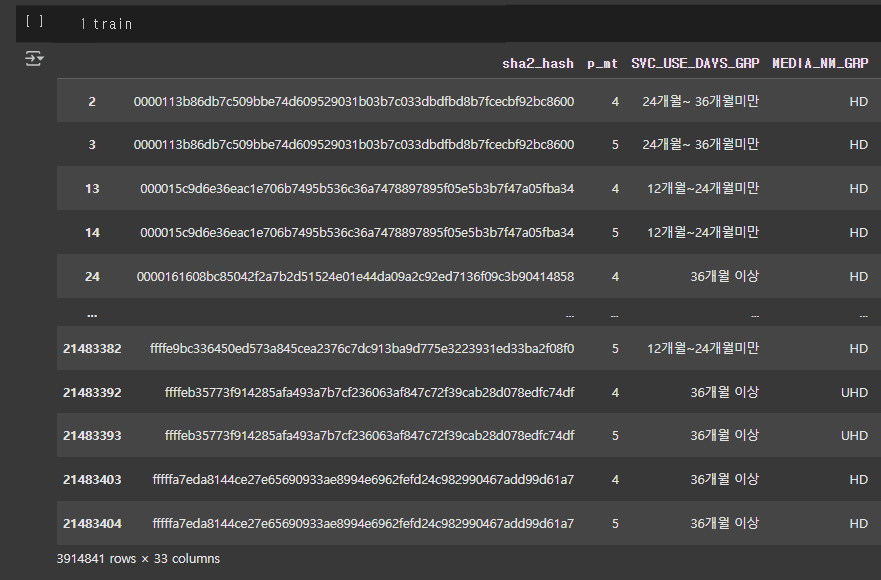

In [ ]:
train = train.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])
test = test.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])

SMOTE-NC Í∏∞Î≤ï ÏÇ¨Ïö©Ìï¥ÏÑú Ïò§Î≤ÑÏÉòÌîåÎßÅ ÌõÑ, CSVÎ°ú Ï†ÄÏû•Ìï®.<br><br>
ÎåÄÎûµ 30Î∂ÑÎèôÏïà ÏßÑÌñâÎê®

In [ ]:
# SMOTE-NCÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ìï¥Í≤∞

X = train.drop(columns = ['churn'])
y = train['churn']

categorical_cols = X.select_dtypes(include='object').columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

print("Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Ïª¨Îüº:", categorical_cols.tolist())
print("Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Ïù∏Îç±Ïä§:", categorical_indices)

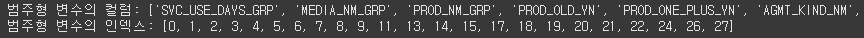

In [ ]:
# SMOTE-NC Í∞ùÏ≤¥ ÏÉùÏÑ±
smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    random_state=42
)

X_smote, y_smote = smote_nc.fit_resample(X, y)

In [ ]:
print("Before SMOTE-NC:")
print(y.value_counts())

print("\nAfter SMOTE-NC:")
print(pd.Series(y_smote).value_counts())

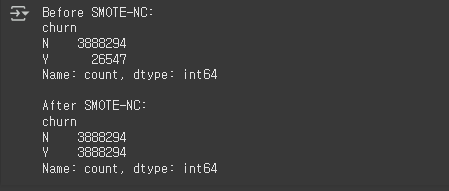

In [ ]:
# Î≥ëÌï©ÌïòÏó¨ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
train_smote_nc = pd.concat([X_smote, y_smote], axis=1)

In [ ]:
display(train_smote_nc)

In [ ]:
# CSVÎ°ú Ï†ÄÏû•
# ÏΩîÎû©ÏóêÏÑú ÌååÏùº ÎßåÎì† Îí§, ÌïÑÏûêÏùò CÎìúÎùºÏù¥Î∏å ÌååÏùºÎ°ú ÏòÆÍπÄ.

csv_path = "/content/drive/MyDrive/Colab Notebooks/data/train_smoteNC_4_5.csv" 
train_smote_nc.to_csv(csv_path, index=False)

In [ ]:
train_smote_nc[train_smote_nc['churn'] == 'Y']

---

### 3. SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ
6:4 ÎπÑÏú®Î°ú (Ïã§Ï†ú ÏÉÅÌô©Í≥º ÎπÑÏä∑ÌïòÍ≤å -> (Ìï¥ÏßÄ Í≥†Í∞ùÏù¥ Îçî Ï†ÅÏùÄ Ìï¥ÏßÄ Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ± ÏÉÅ))

train -> 4,5Ïõî Îç∞Ïù¥ÌÑ∞Î•º smote_nc ÏßÑÌñâ <br>
test -> 11Ïõî Îç∞Ïù¥ÌÑ∞Î•º test ÏßÑÌñâ

ÏúÑÏóêÏÑú ÎßåÎì§ÏóàÎçò SMOTE-NC Îç∞Ïù¥ÌÑ∞Î•º 6:4 ÎπÑÏú®Î°ú ÏßÑÌñâ

In [32]:
df_smote = pd.read_csv("data/train_smoteNC_4_5.csv")

In [34]:
df_smote['churn'].value_counts()

churn
N    3888294
Y    3888294
Name: count, dtype: int64

In [35]:
X = df_smote.drop(columns=['churn'])
y = df_smote['churn']

In [39]:
num_N = sum(y == 'N')  # N Í∞úÏàò Ïú†ÏßÄ
target_Y_final = int(num_N * (4 / 6))  # NÏóê ÎßûÏ∂∞ Y Í∞úÏàò ÏÑ§Ï†ï
display(num_N, target_Y_final)

3888294

2592196

In [40]:
# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ïã§Ìñâ (YÎ•º 6:4 ÎπÑÏú®Ïóê ÎßûÍ≤å Ï§ÑÏù¥Í∏∞)
under = RandomUnderSampler(
    sampling_strategy={'N': num_N, 'Y': target_Y_final},  # YÎ•º Ï§ÑÏù¥Í∏∞
    random_state=42
)

X_resampled, y_resampled = under.fit_resample(X, y)

In [41]:
# Îã§Ïãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [42]:
print("‚úÖ ÏµúÏ¢Ö ÏÉòÌîåÎßÅ ÏôÑÎ£å!")
print("üìä ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:\n", df_resampled['churn'].value_counts())

‚úÖ ÏµúÏ¢Ö ÏÉòÌîåÎßÅ ÏôÑÎ£å!
üìä ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨:
 churn
N    3888294
Y    2592196
Name: count, dtype: int64


In [45]:
df_resampled.to_csv("data/train/train_underSmote_4_5.csv", index=False)

---

### 4. Í∞ÄÏ§ëÏπò

Í∞ÄÏ§ëÏπòÎäî Î™®Îç∏ ÌïôÏäµÏãú, <b>class_weights = 'balanced'</b>Î•º Ï†ÅÏö©

---

### 5. Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ ÌôïÏù∏

In [6]:
df_1 = pd.read_csv("data/train/train_undersample_4_5.csv")
df_2 = pd.read_csv("data/train/train_smoteNC_4_5.csv")
df_3 = pd.read_csv("data/train/train_underSmote_4_5.csv")

In [7]:
# ÎπÑÏú® ÌôïÏù∏
display(df_1['churn'].value_counts(normalize=True) * 100)
display(df_2['churn'].value_counts(normalize=True) * 100)
display(df_3['churn'].value_counts(normalize=True) * 100)

churn
N   50.00
Y   50.00
Name: proportion, dtype: float64

churn
N   50.00
Y   50.00
Name: proportion, dtype: float64

churn
N   60.00
Y   40.00
Name: proportion, dtype: float64

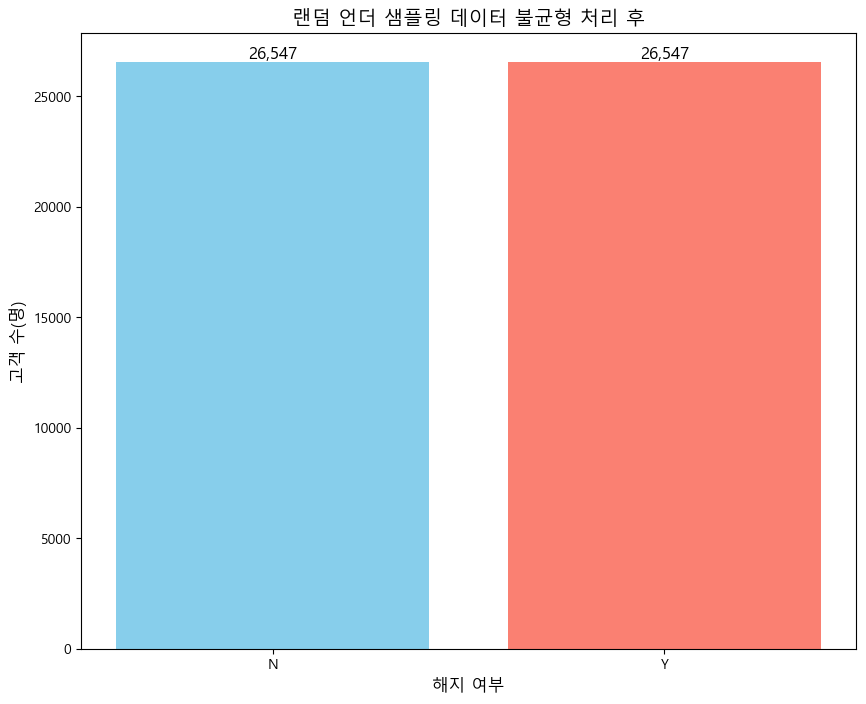

In [13]:
# ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ
churn_counts = df_1['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)
    
plt.xlabel('Ìï¥ÏßÄ Ïó¨Î∂Ä', fontsize=12)
plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
plt.title('ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ ÌõÑ', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


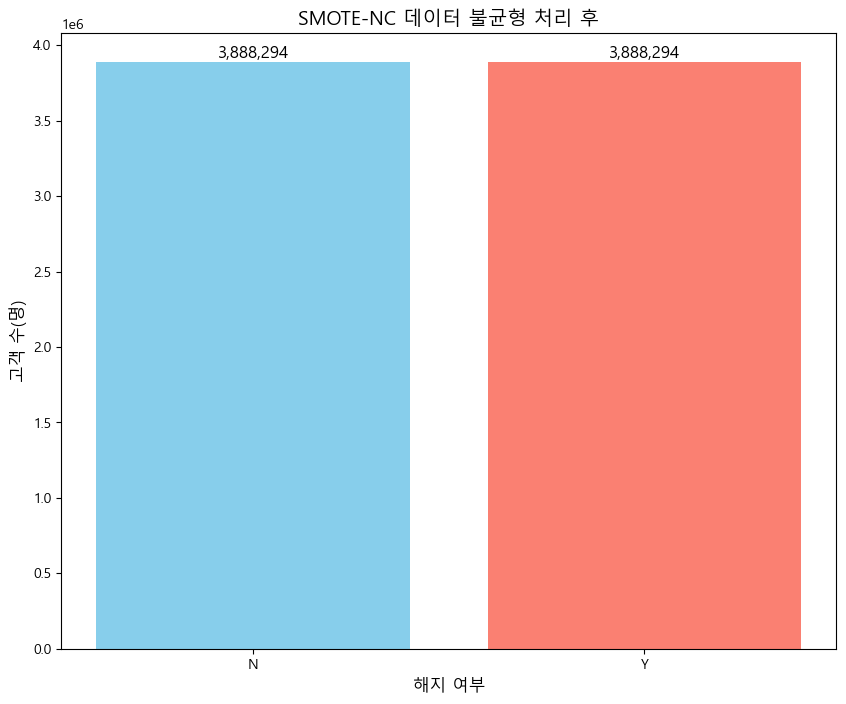

In [12]:
# SMOTE-NC
churn_counts = df_2['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Ìï¥ÏßÄ Ïó¨Î∂Ä', fontsize=12)
plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
plt.title('SMOTE-NC Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ ÌõÑ', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


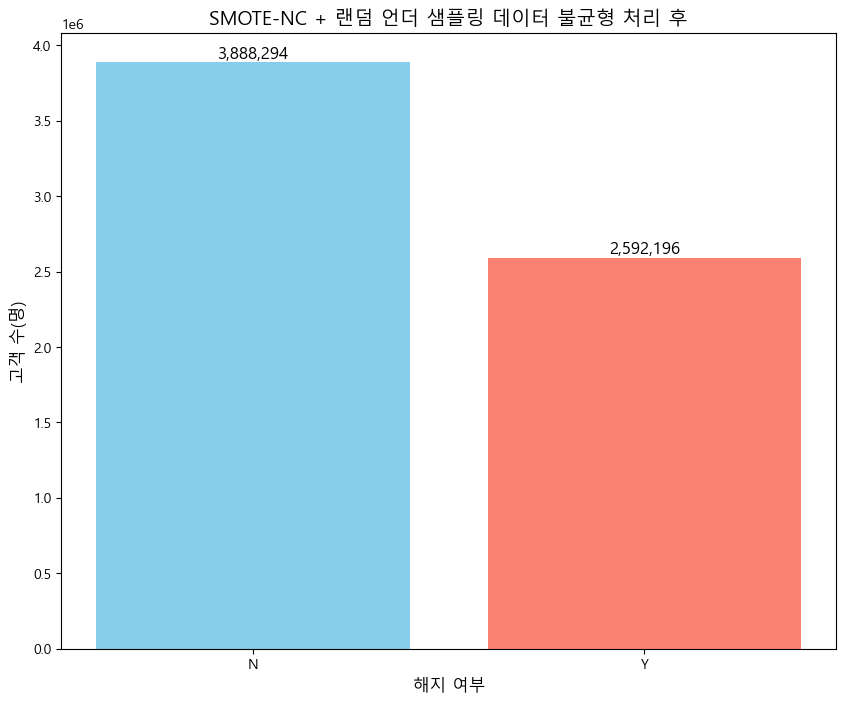

In [11]:
# SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ
churn_counts = df_3['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Ìï¥ÏßÄ Ïó¨Î∂Ä', fontsize=12)
plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
plt.title('SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ ÌõÑ', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


SMOTE-NCÏôÄ SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅÌïúÍ±∞ Î∞òÏò¨Î¶º

In [22]:
# SMOTE-NC
df_2['TV_I_CNT'] = df_2['TV_I_CNT'].round()

In [23]:
# SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ
df_3['TV_I_CNT'] = df_3['TV_I_CNT'].round()

In [25]:
display(df_2[['TV_I_CNT']], df_3[['TV_I_CNT']])

TV_I_CNT
0            3.00
1            3.00
2            2.00
3            2.00
4            6.00
...           ...
7776583      2.00
7776584      3.00
7776585      4.00
7776586      2.00
7776587      2.00

[7776588 rows x 1 columns]

TV_I_CNT
0            6.00
1            2.00
2            1.00
3            2.00
4            3.00
...           ...
6480485      2.00
6480486      1.00
6480487      4.00
6480488      1.00
6480489      2.00

[6480490 rows x 1 columns]

INHOME_RATE Í∞íÏùÄ Î≥ÄÍ≤Ω ÌõÑ, objectÌòïÏúºÎ°ú
  - smote-nc ÎïåÎ¨∏Ïóê INHOME_RATEÏùò Í∞íÏù¥ 68.22 Í∞ôÏùÄ Í∞íÏù¥ Ï°¥Ïû¨ÌïòÍ≤å Îê®.

In [26]:
df_1['INHOME_RATE'] = df_1['INHOME_RATE'].astype(str)
df_2['INHOME_RATE'] = df_2['INHOME_RATE'].astype(str)
df_3['INHOME_RATE'] = df_3['INHOME_RATE'].astype(str)

In [28]:
# INHOME_RATE Í∞í Î∞òÏò¨Î¶º Ìï®Ïàò

def round_INHOME(value):
  if value.replace('.', '').isdigit():
    return str(round(float(value) /10) * 10)
  return value

In [29]:
df_2['INHOME_RATE'] = df_2['INHOME_RATE'].apply(round_INHOME)
df_3['INHOME_RATE'] = df_3['INHOME_RATE'].apply(round_INHOME)

In [39]:
display(df_2['INHOME_RATE'].value_counts(), df_3['INHOME_RATE'].value_counts())

INHOME_RATE
0      2965494
10     1354039
20     1125052
30      873313
40      652346
50      433725
60      242869
70       96751
80       28125
90        4854
100         20
Name: count, dtype: int64

INHOME_RATE
0      2332190
10     1137266
20      960402
30      758094
40      570114
50      383826
60      218188
70       89009
80       26617
90        4764
100         20
Name: count, dtype: int64

ÏõêÎûò Îç∞Ïù¥ÌÑ∞ Ìè¥ÎçîÏóê ÏûàÎäî Í≤ÉÎì§ÏùÑ ÏÇ≠Ï†úÌïòÍ≥† Ìï¥Îãπ ÌååÏùºÎì§ÏùÑ Îã§Ïãú Ï†ÄÏû•

In [43]:
df_1.to_csv("data/train/train_undersample_4_5.csv", index=False)

In [44]:
df_2.to_csv("data/train/train_smoteNC_4_5.csv", index=False)

In [45]:
df_3.to_csv("data/train/train_underSmote_4_5.csv", index=False)

##### df_1(ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) ÌôïÏù∏

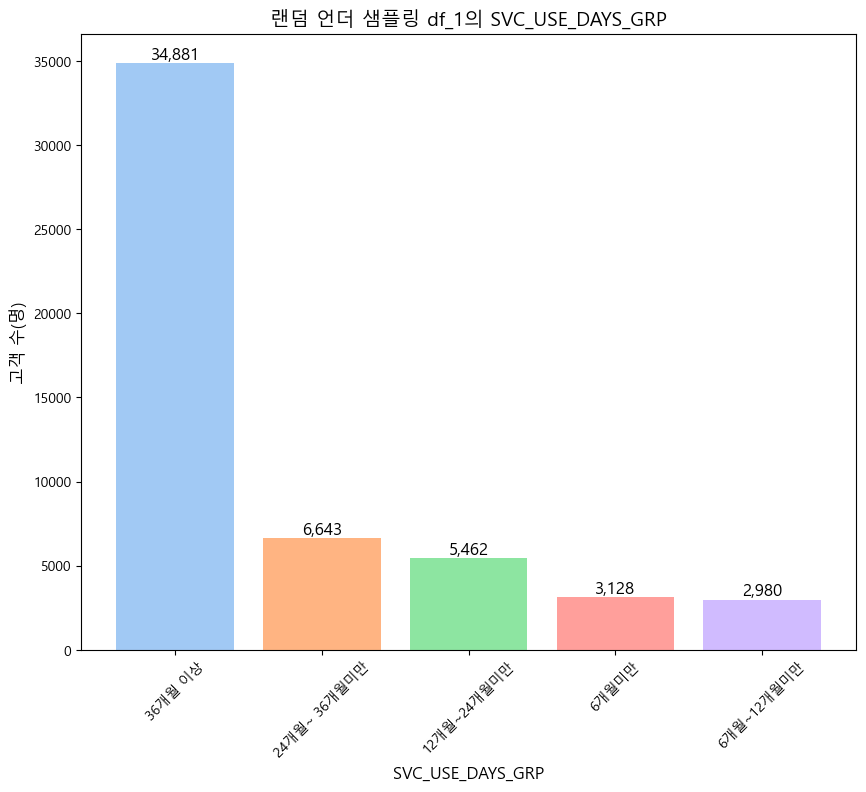

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

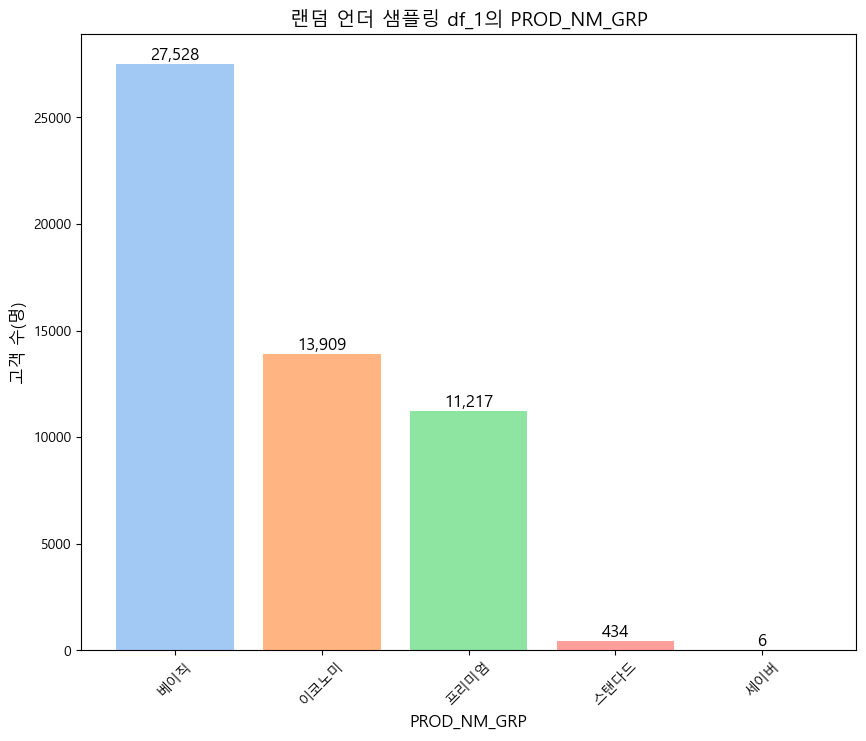

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

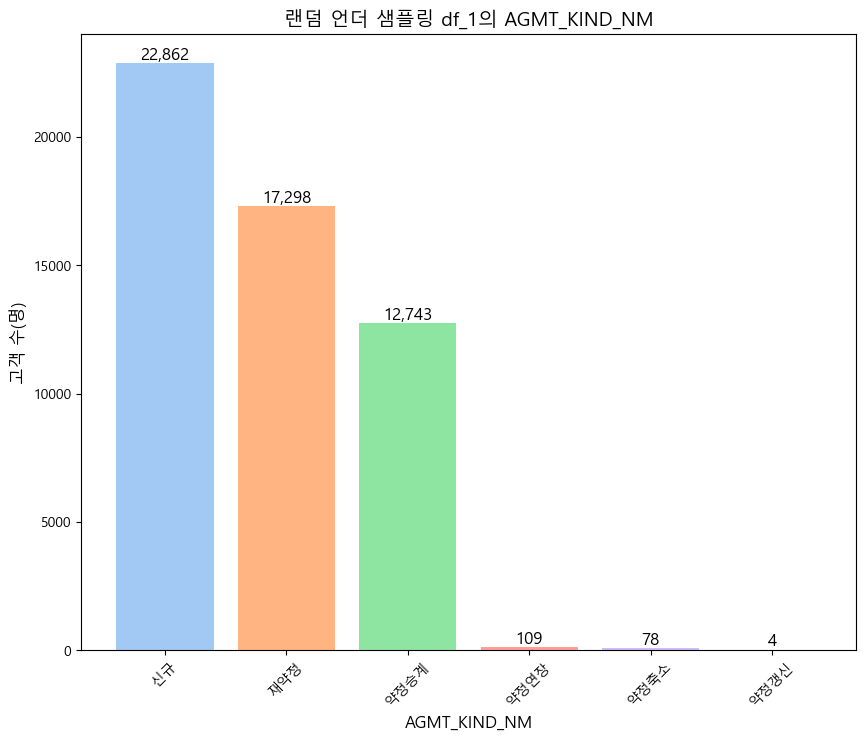

<Figure size 640x480 with 0 Axes>

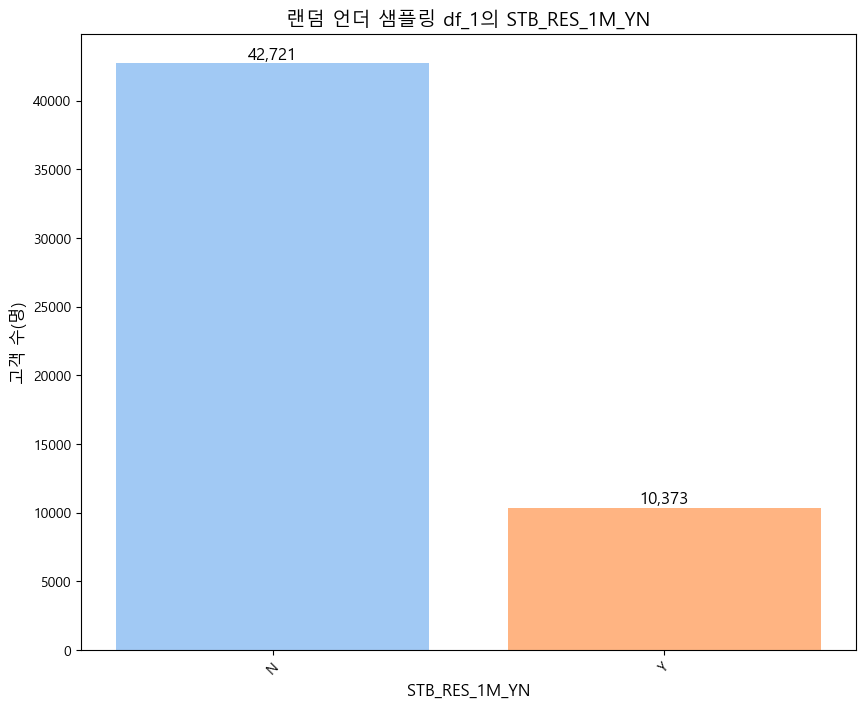

<Figure size 640x480 with 0 Axes>

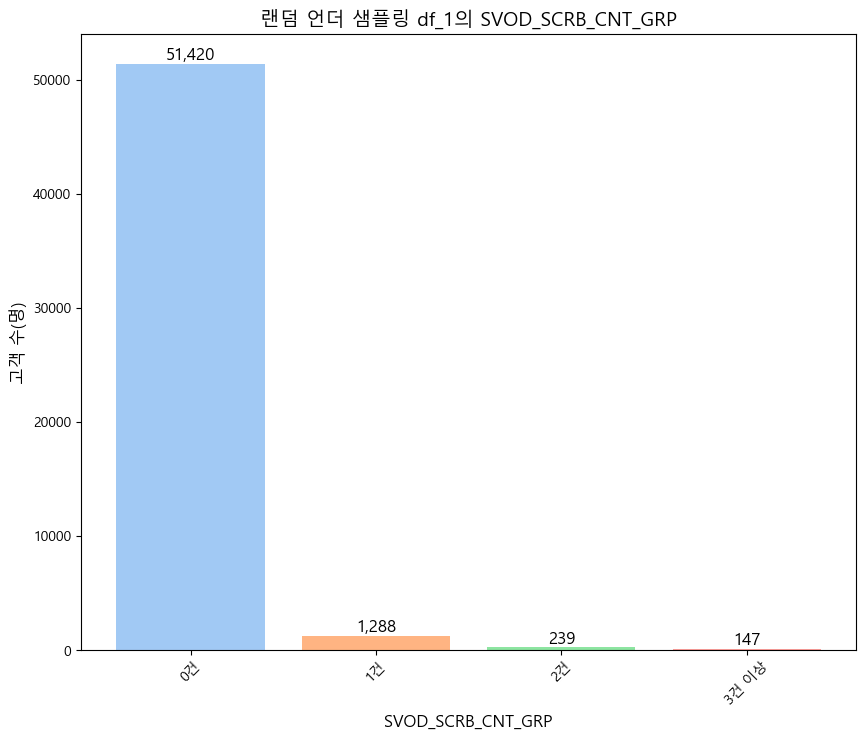

<Figure size 640x480 with 0 Axes>

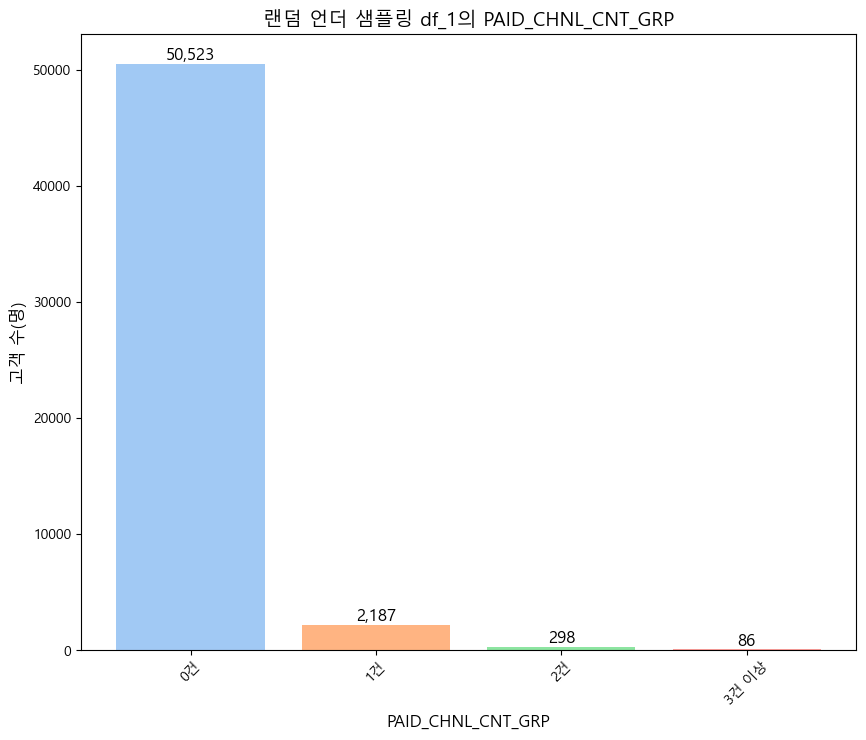

<Figure size 640x480 with 0 Axes>

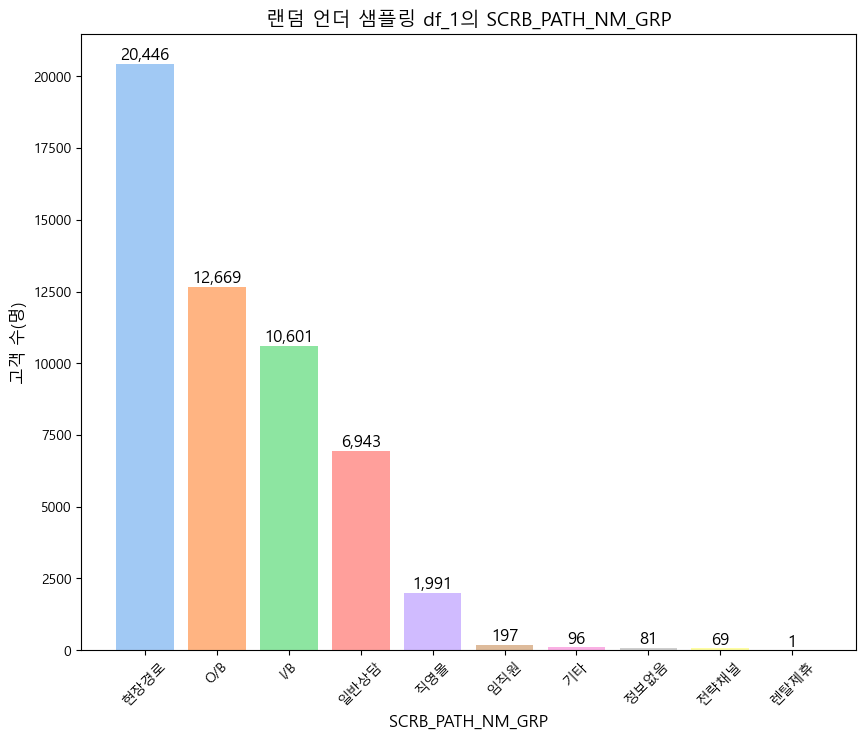

<Figure size 640x480 with 0 Axes>

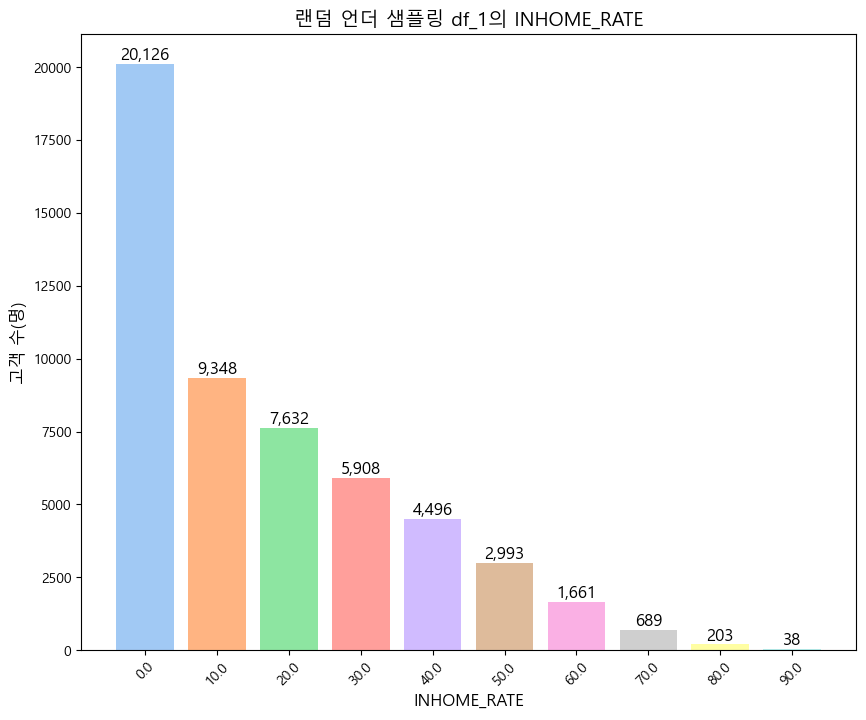

<Figure size 640x480 with 0 Axes>

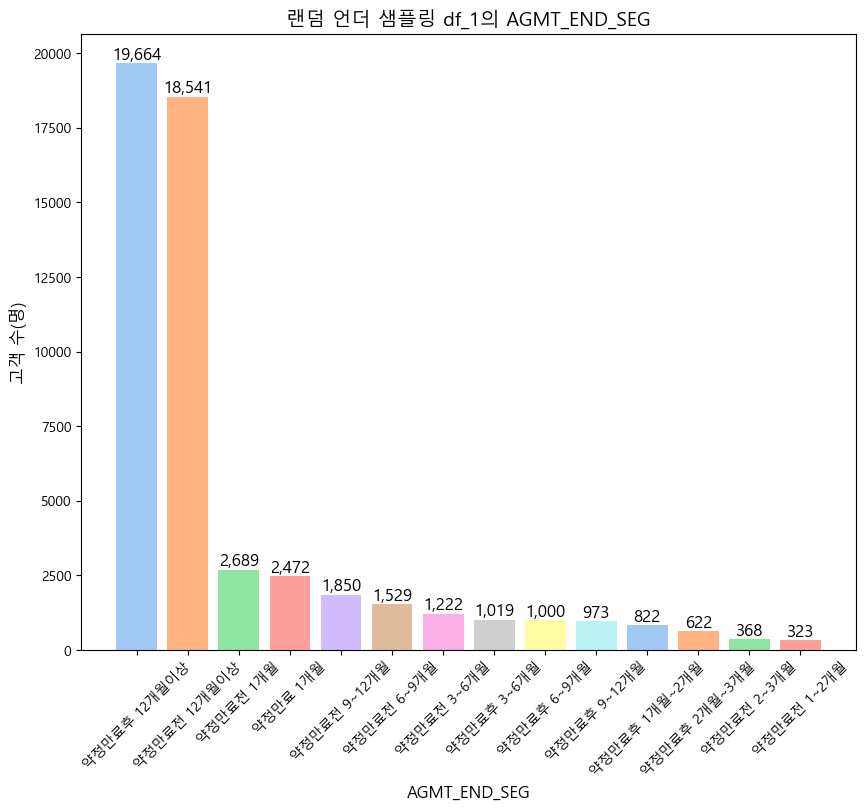

<Figure size 640x480 with 0 Axes>

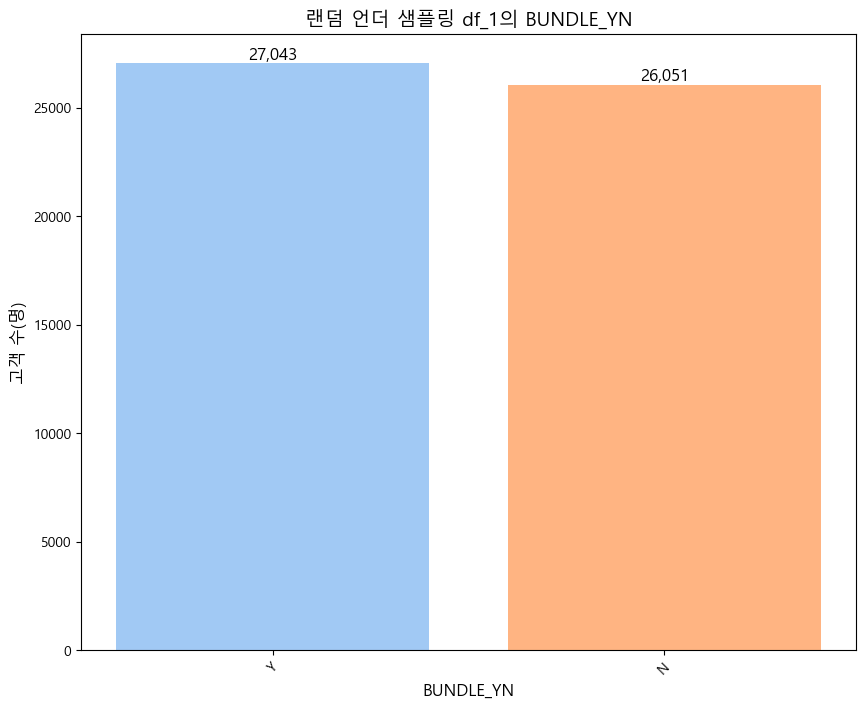

<Figure size 640x480 with 0 Axes>

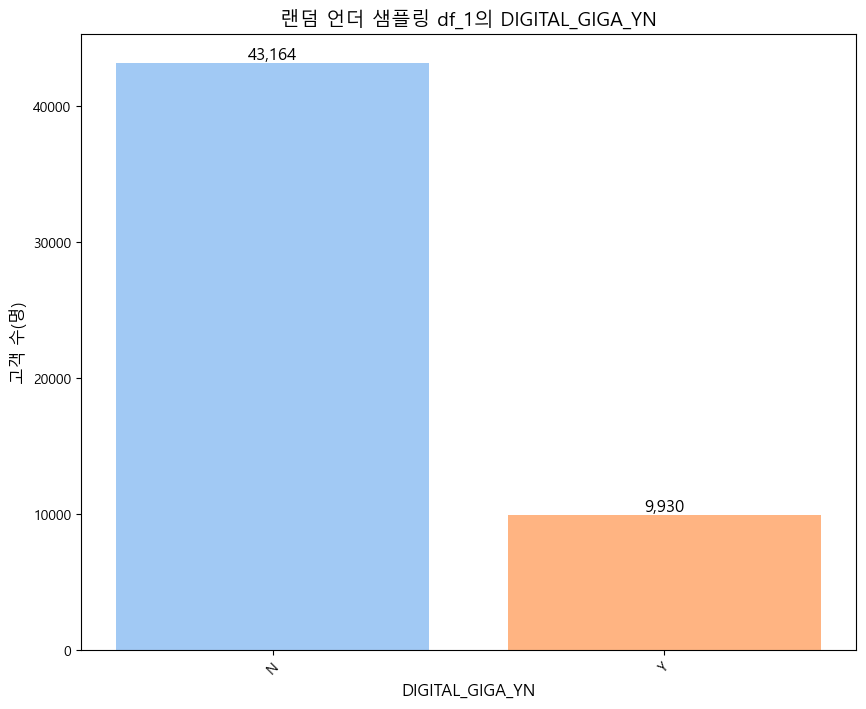

<Figure size 640x480 with 0 Axes>

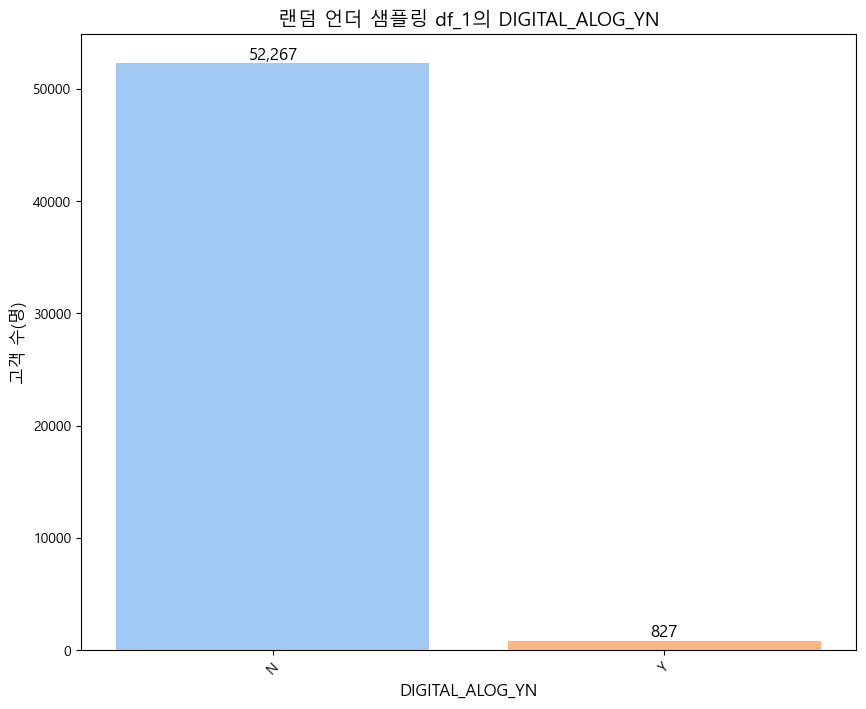

<Figure size 640x480 with 0 Axes>

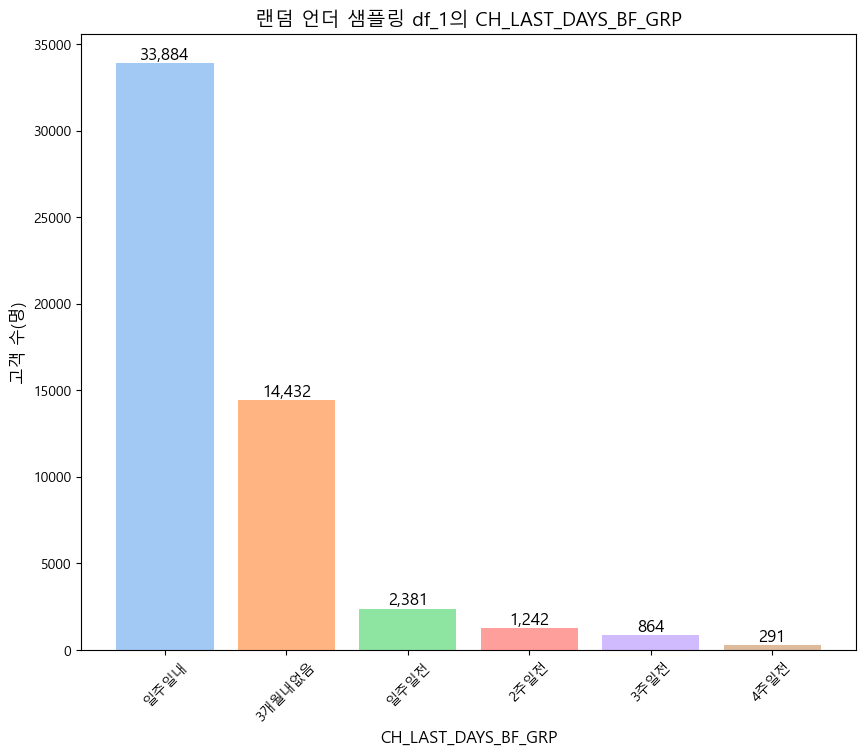

<Figure size 640x480 with 0 Axes>

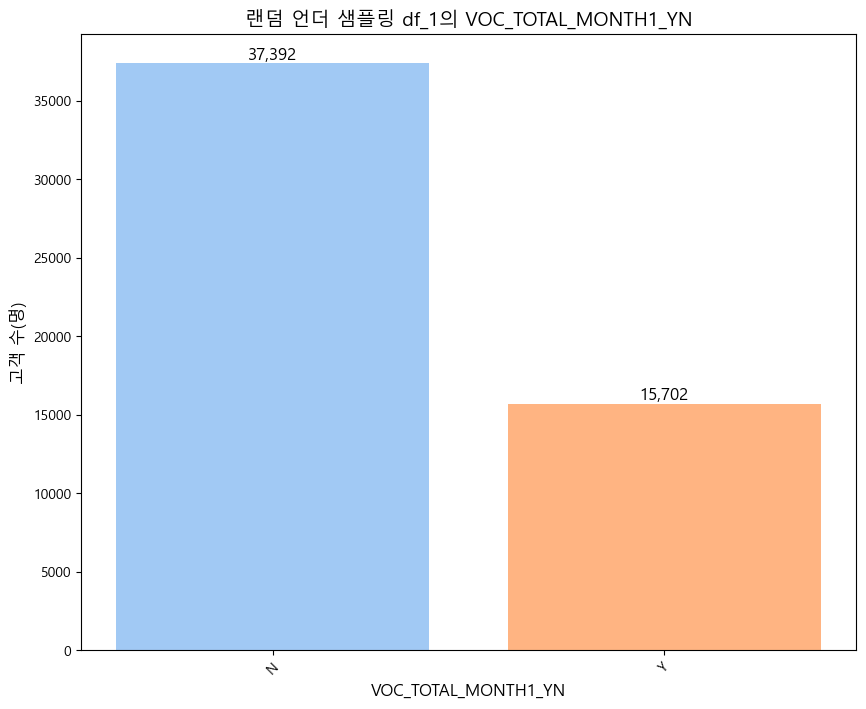

<Figure size 640x480 with 0 Axes>

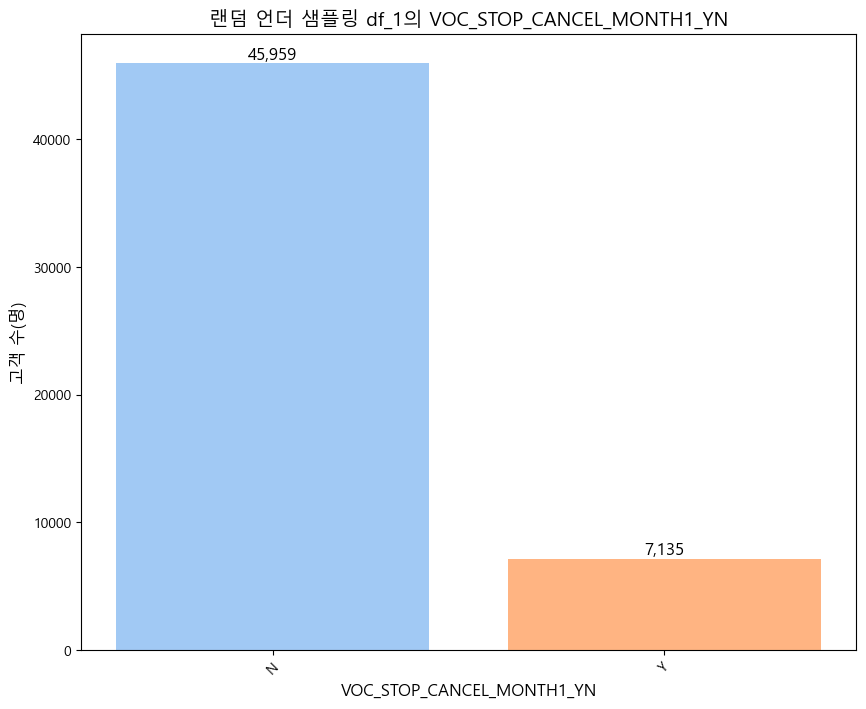

<Figure size 640x480 with 0 Axes>

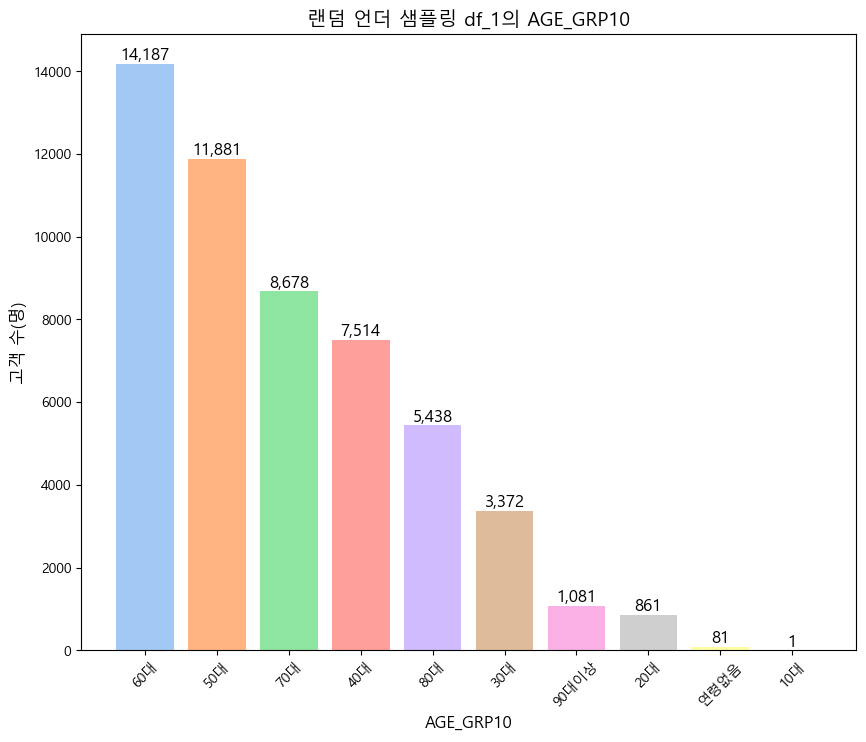

<Figure size 640x480 with 0 Axes>

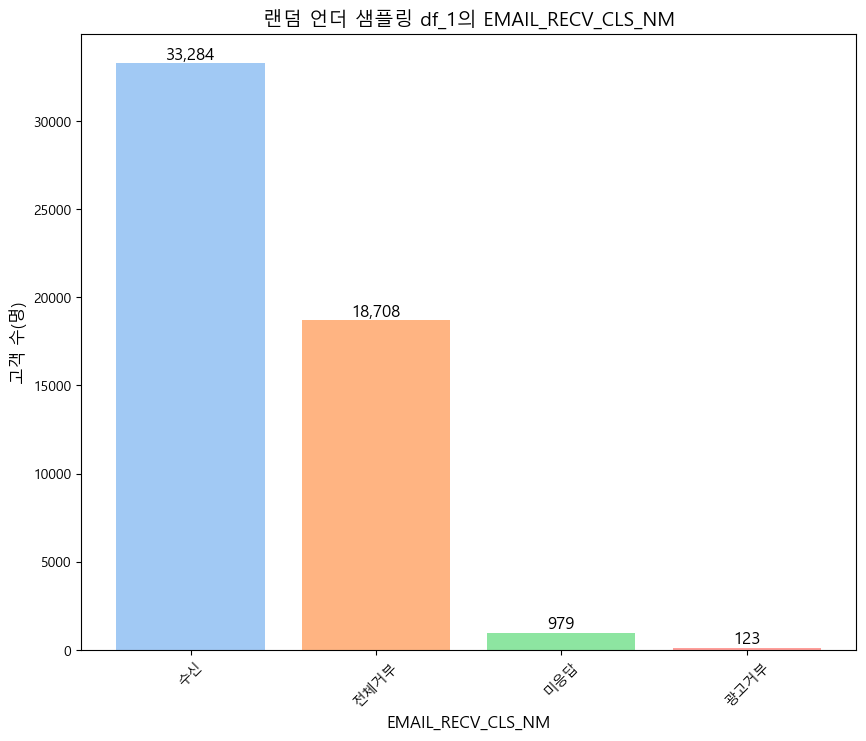

<Figure size 640x480 with 0 Axes>

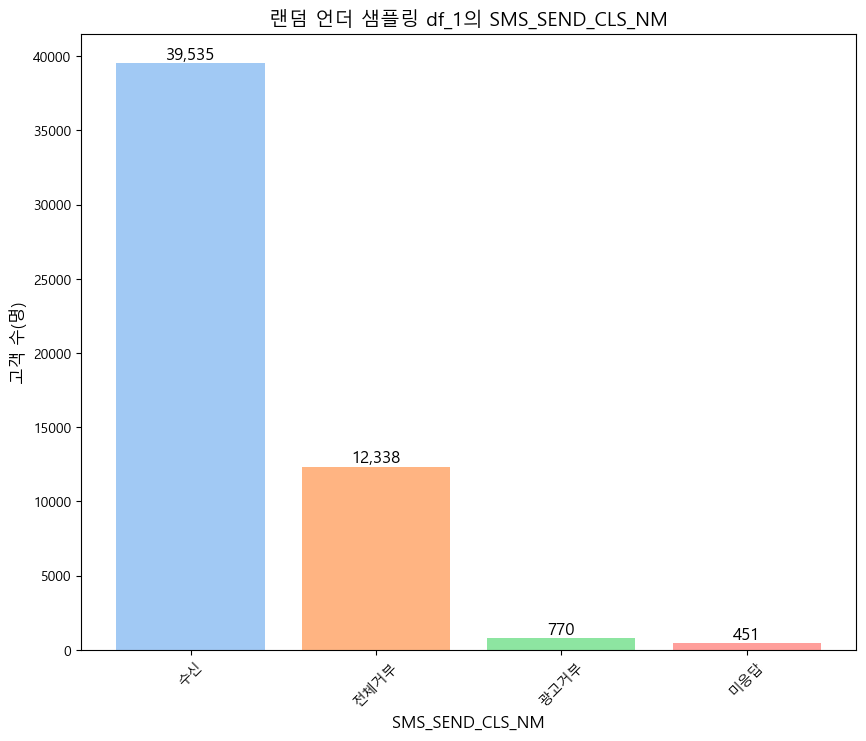

<Figure size 640x480 with 0 Axes>

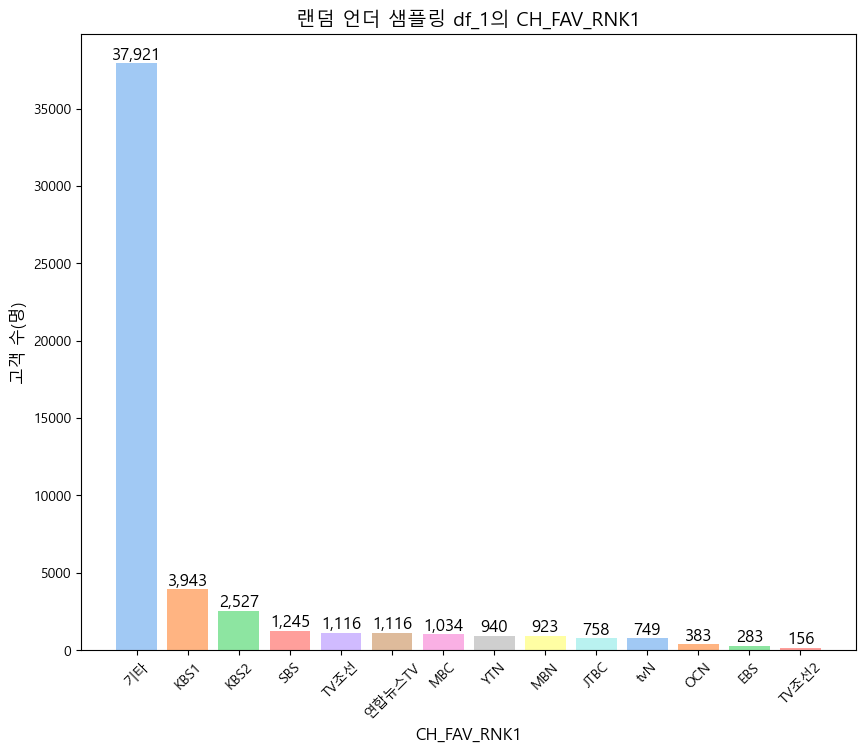

<Figure size 640x480 with 0 Axes>

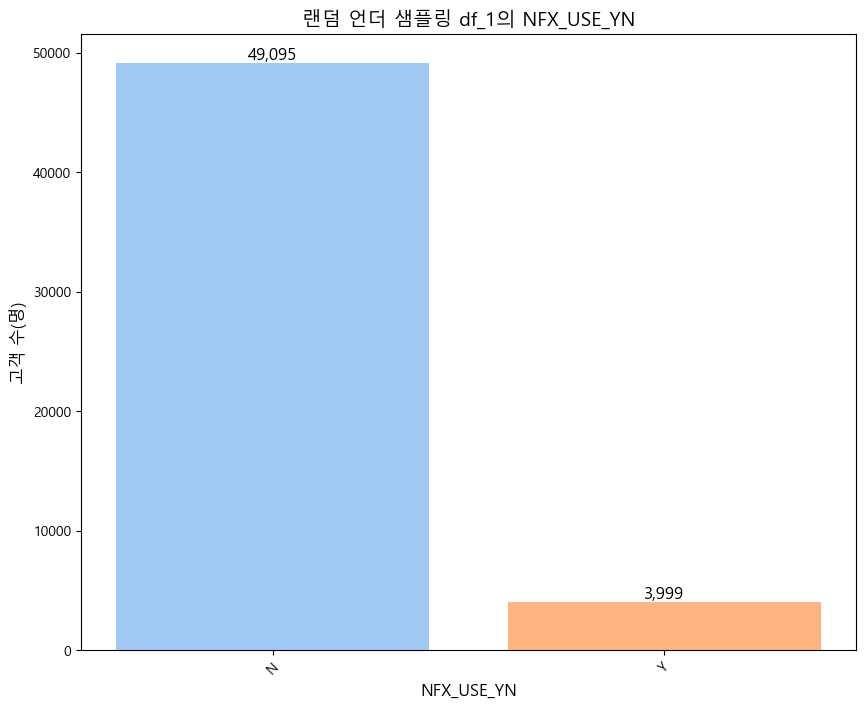

<Figure size 640x480 with 0 Axes>

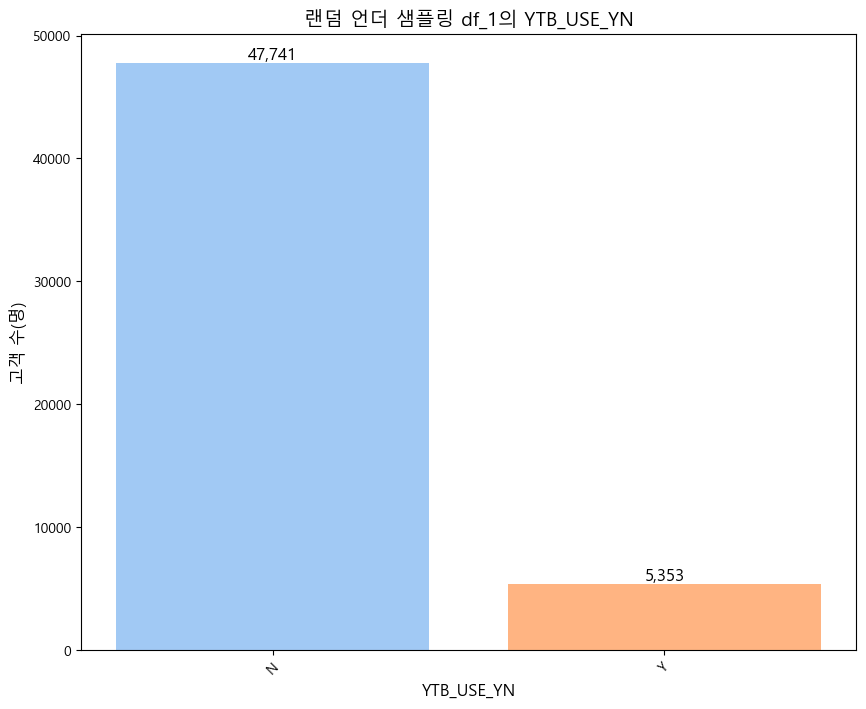

<Figure size 640x480 with 0 Axes>

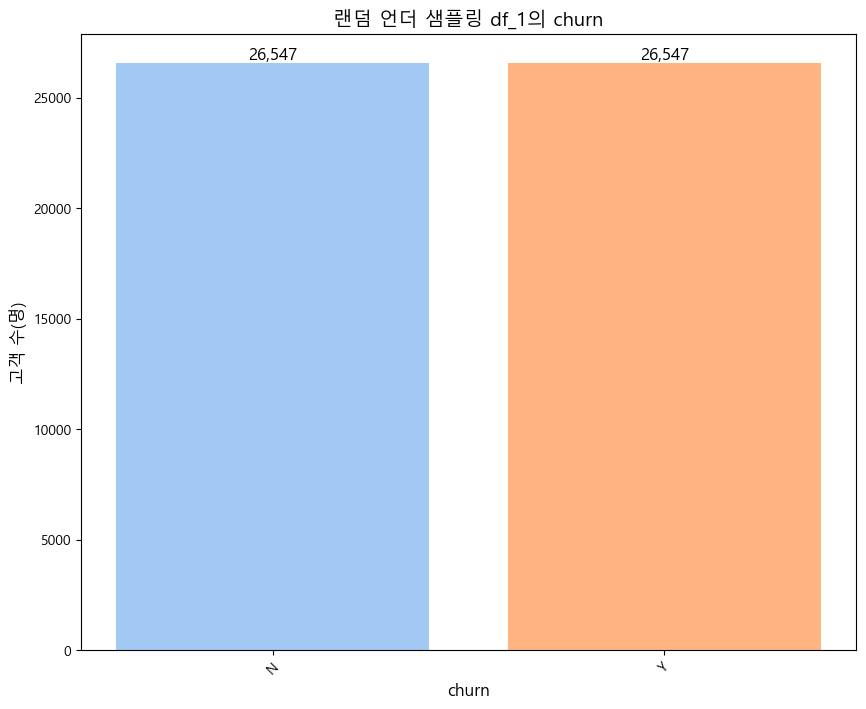

<Figure size 640x480 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_1.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_1[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
        plt.title(f'ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ df_1Ïùò {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()
        plt.clf()


#### df_2 SMOTE-NC ÌôïÏù∏

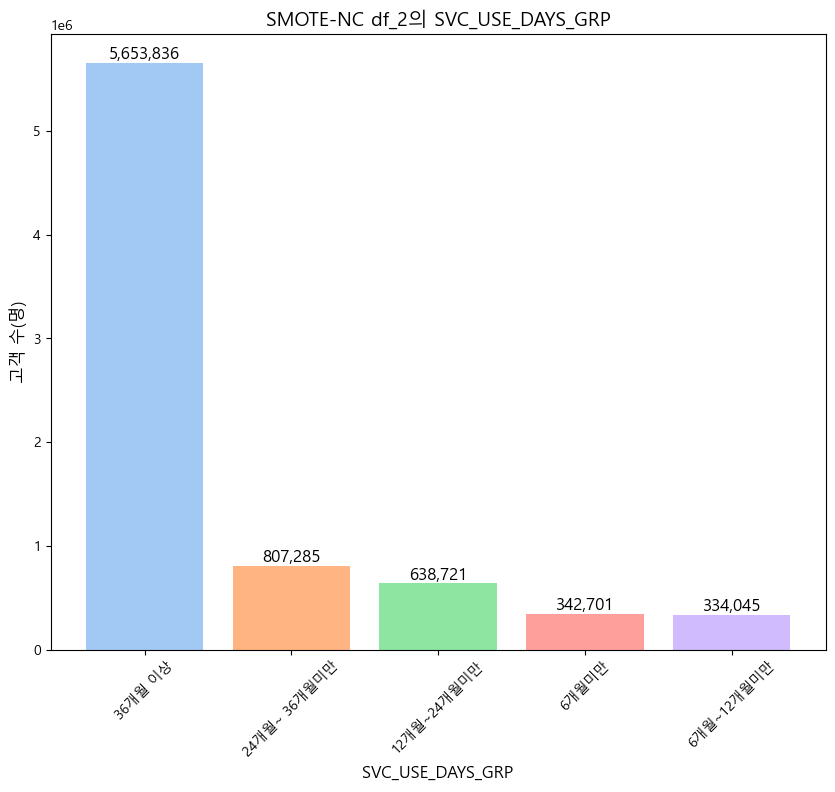

<Figure size 640x480 with 0 Axes>

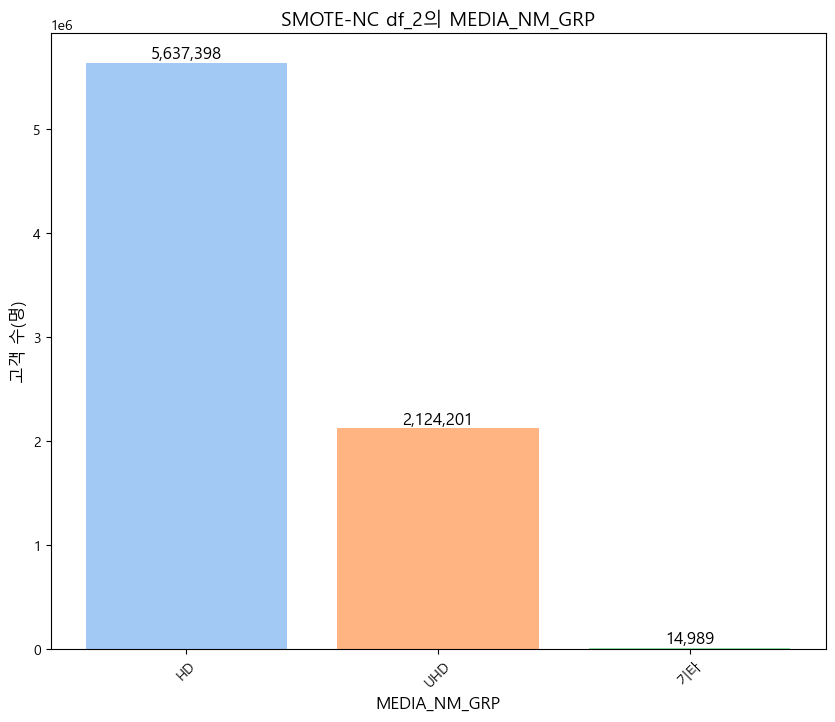

<Figure size 640x480 with 0 Axes>

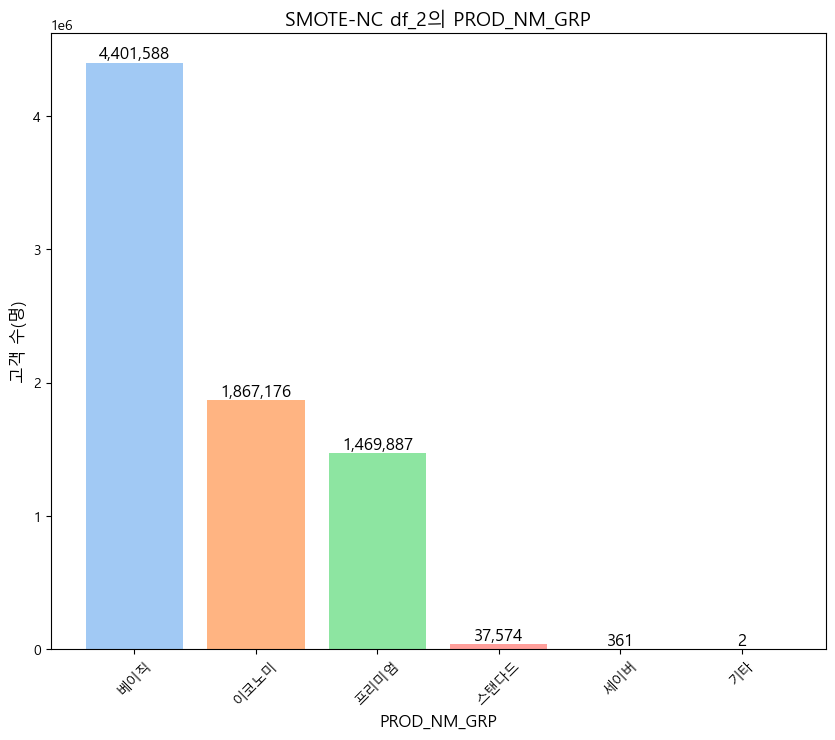

<Figure size 640x480 with 0 Axes>

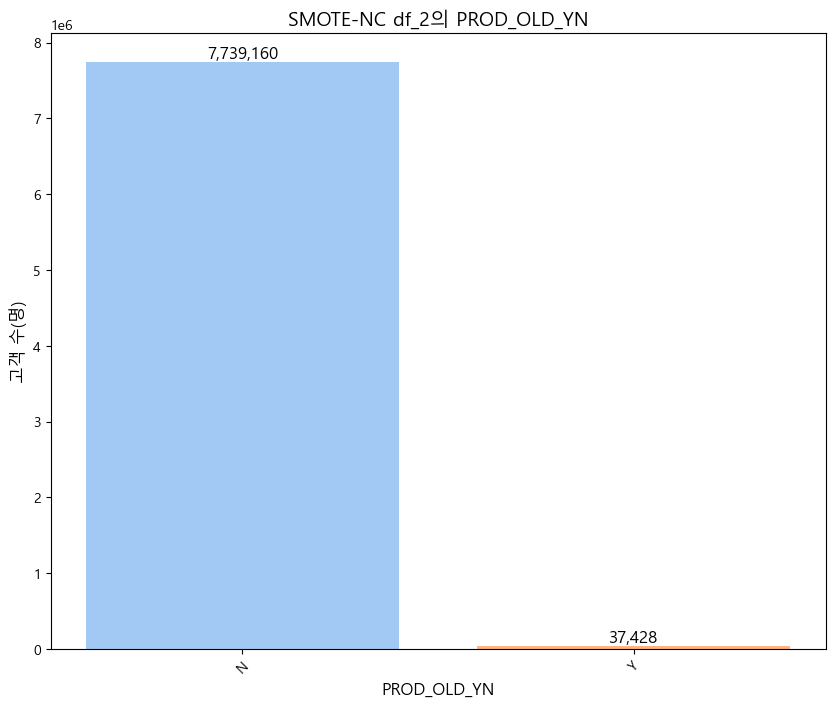

<Figure size 640x480 with 0 Axes>

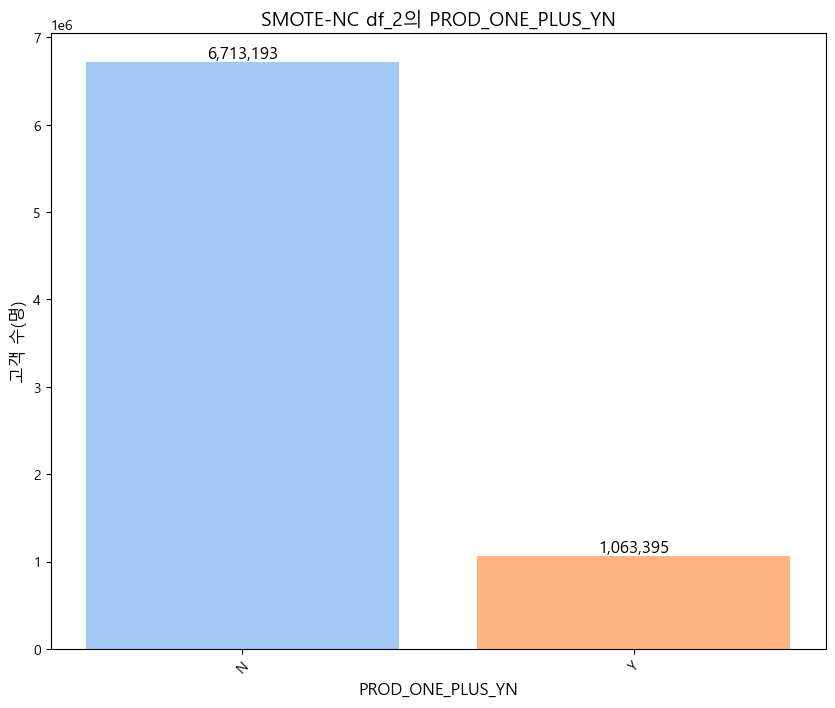

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

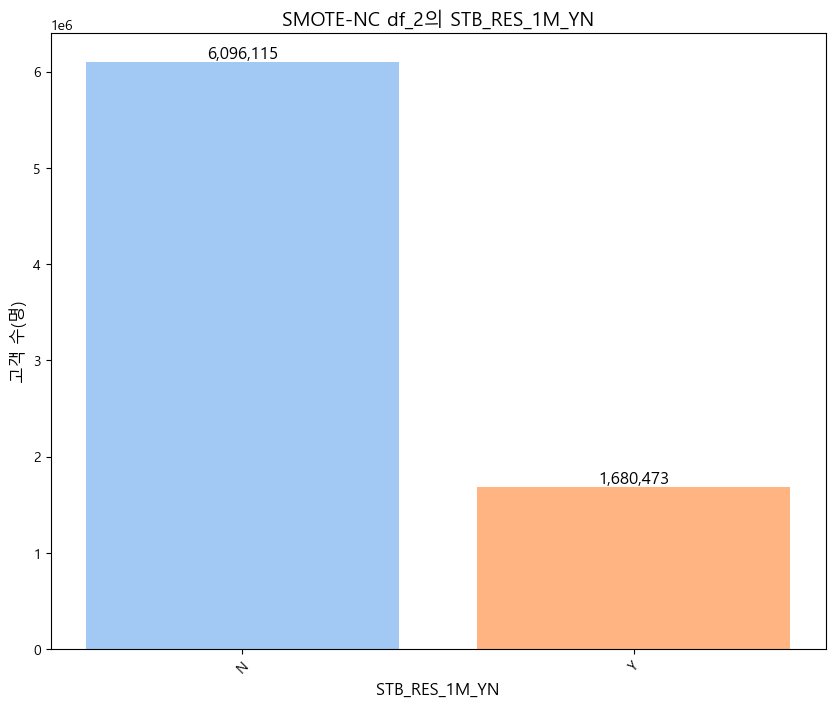

<Figure size 640x480 with 0 Axes>

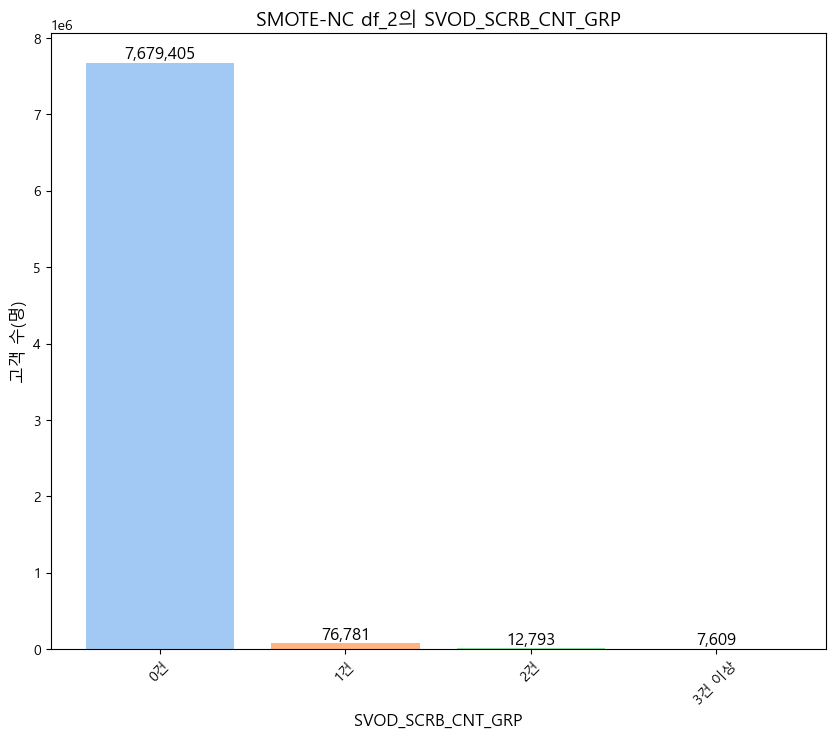

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

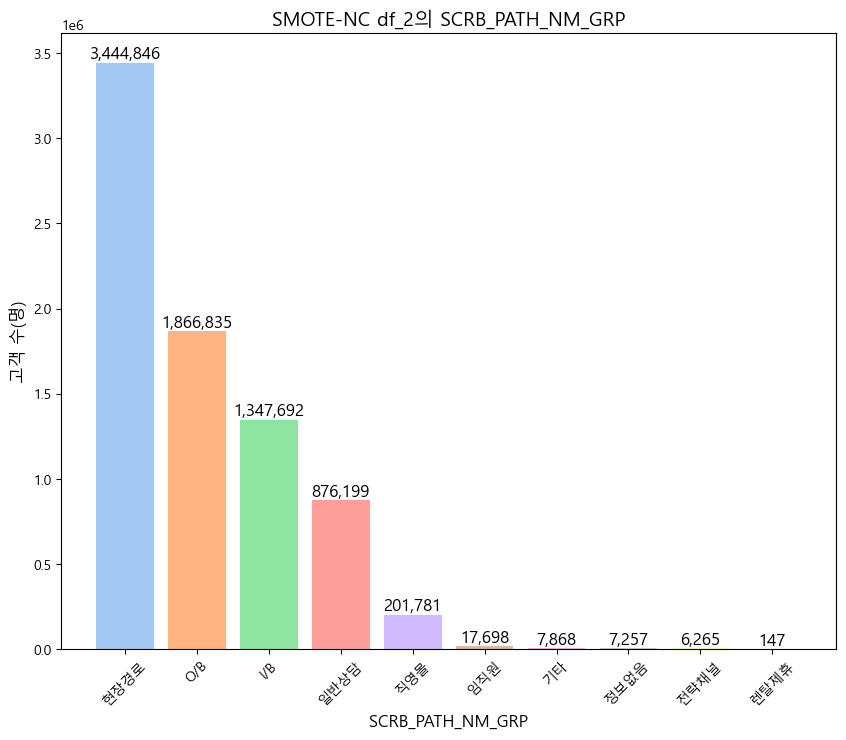

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

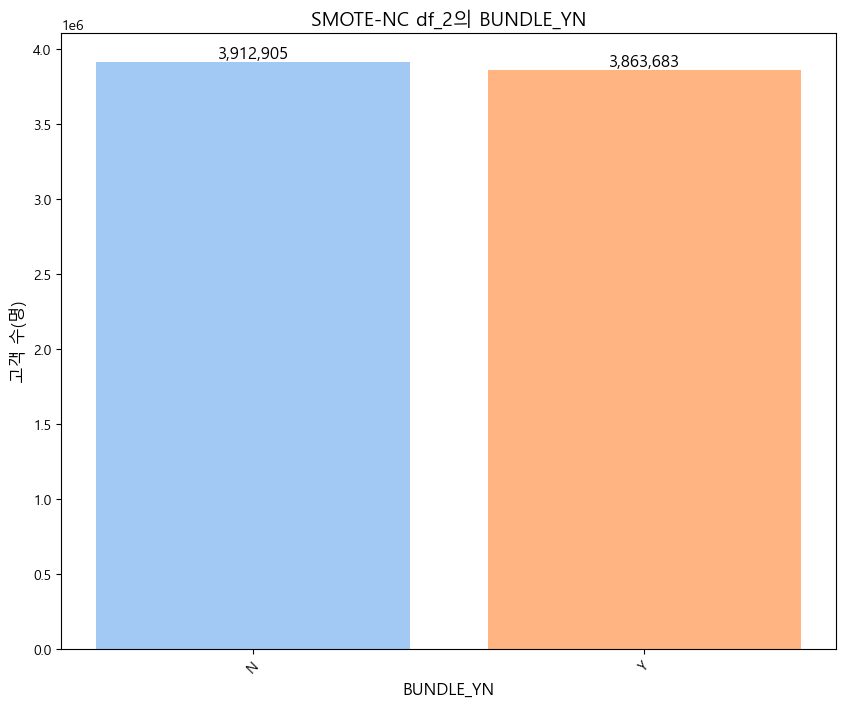

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

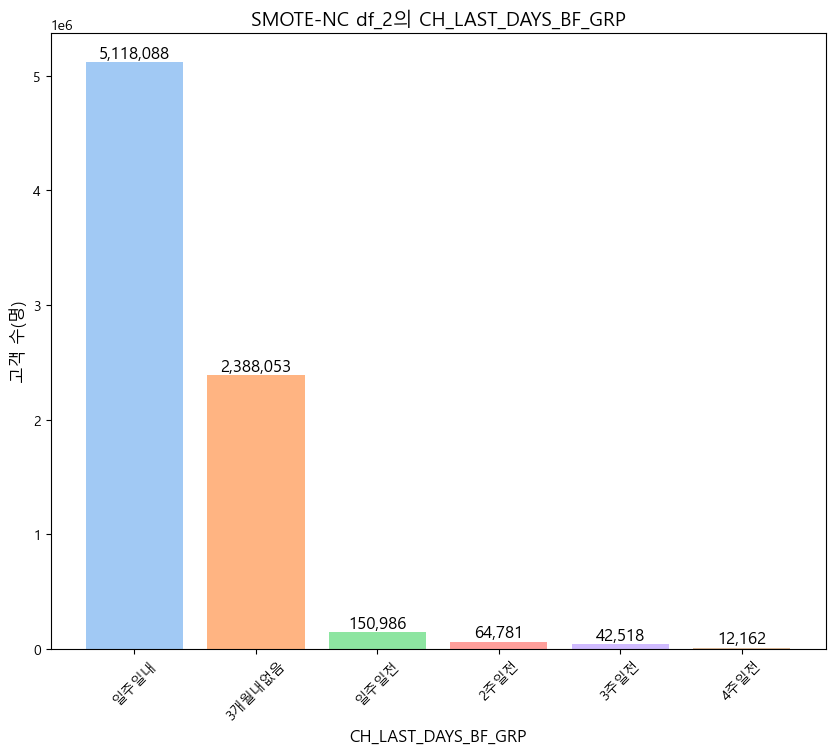

<Figure size 640x480 with 0 Axes>

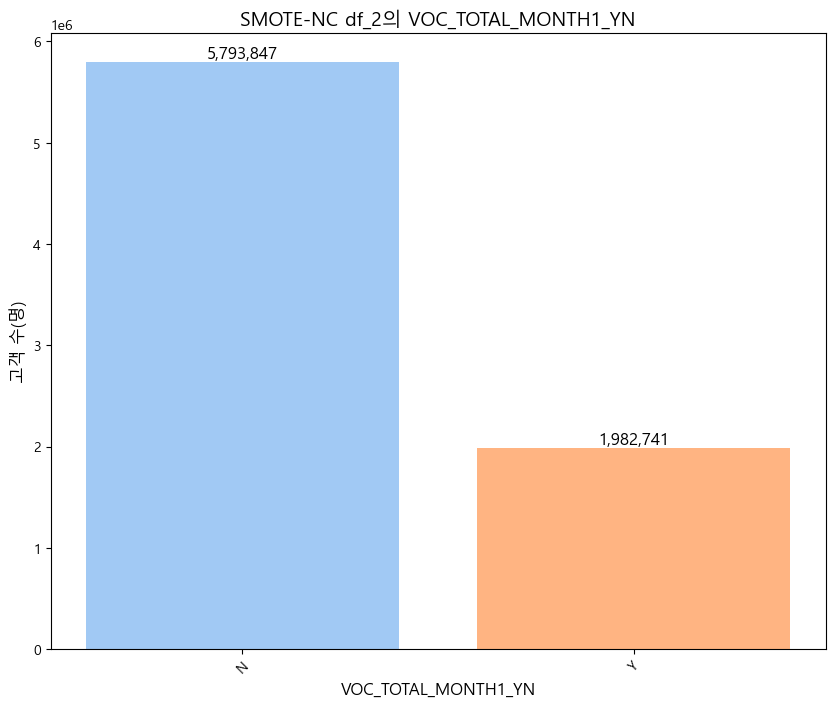

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

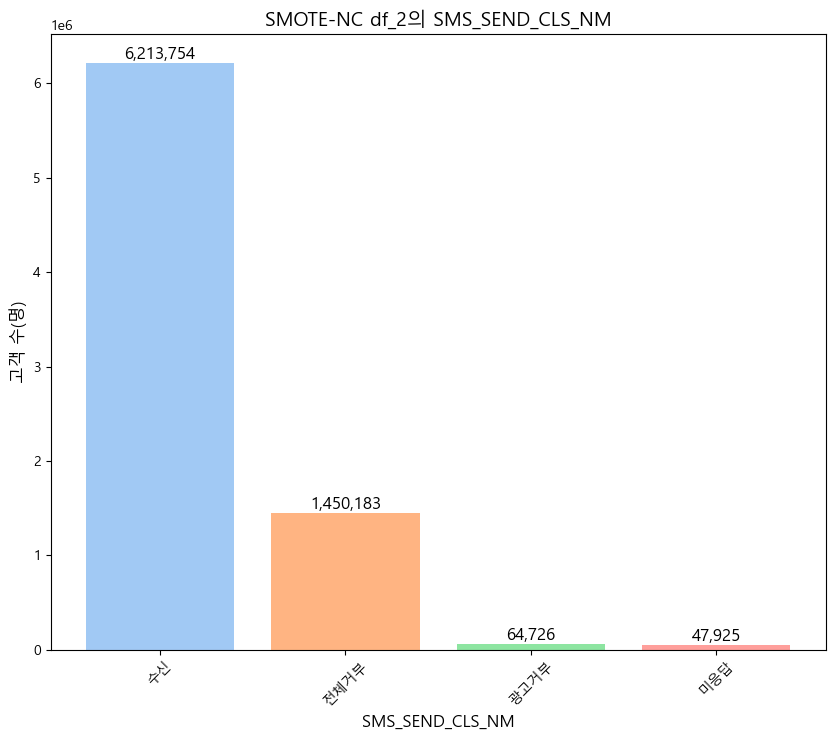

<Figure size 640x480 with 0 Axes>

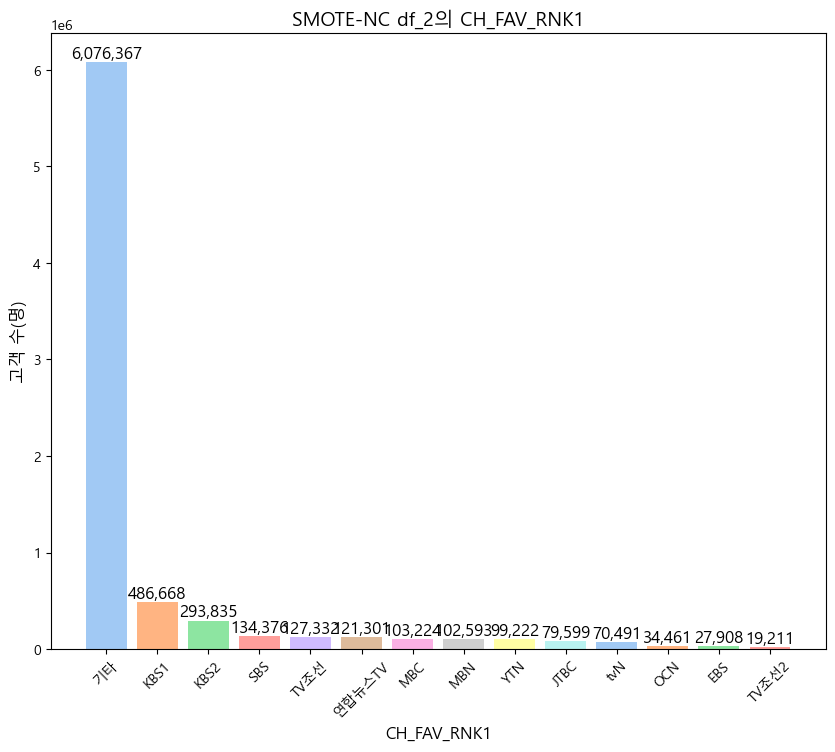

<Figure size 640x480 with 0 Axes>

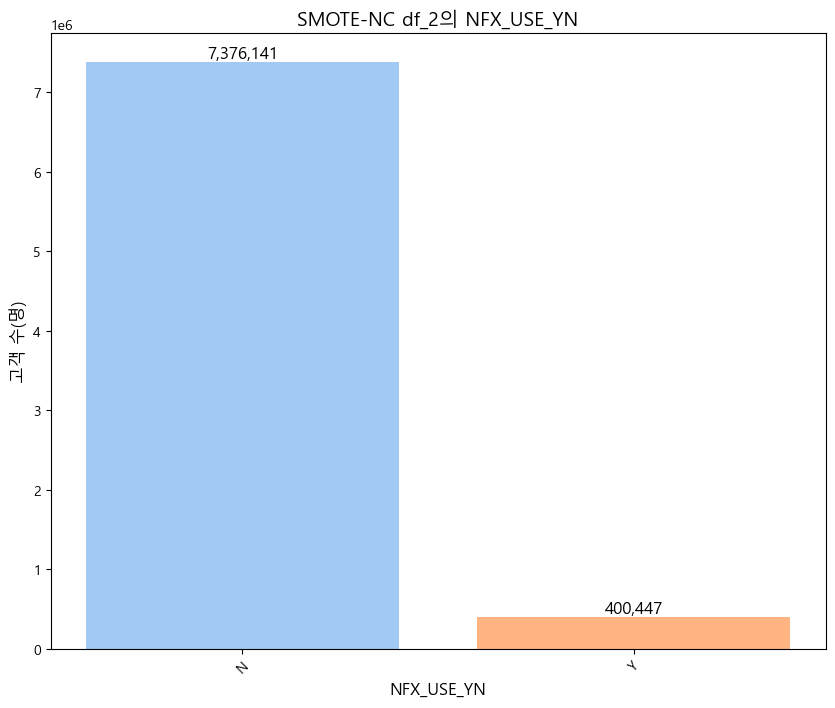

<Figure size 640x480 with 0 Axes>

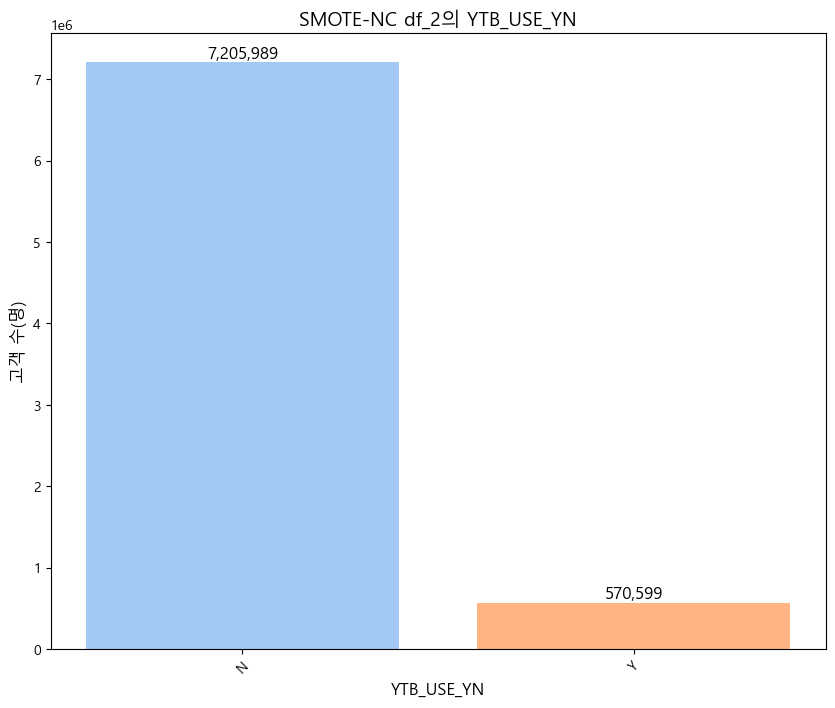

<Figure size 640x480 with 0 Axes>

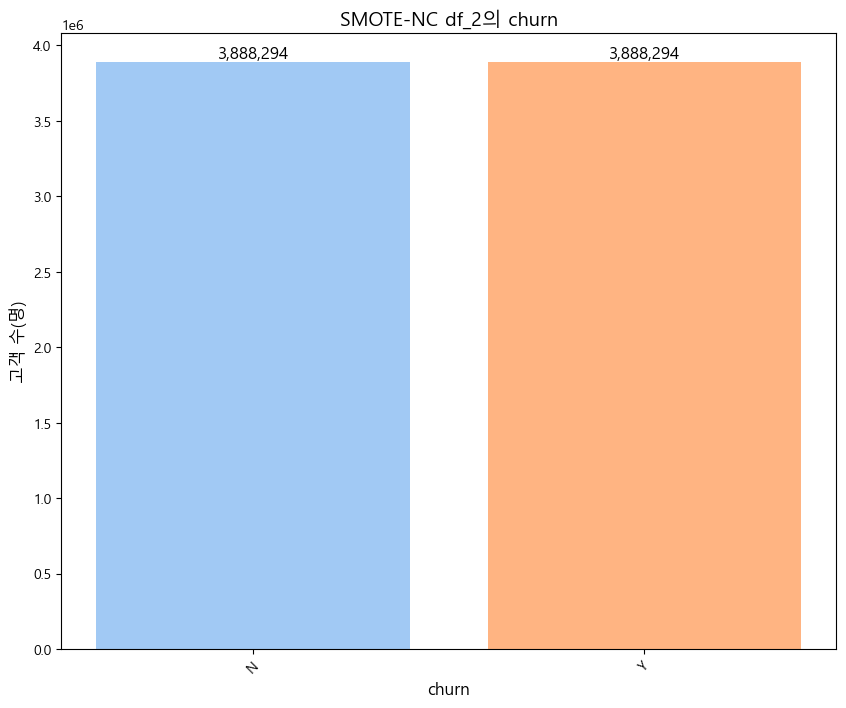

<Figure size 640x480 with 0 Axes>

In [61]:
object_columns = df_2.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_2[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
        plt.title(f'SMOTE-NC df_2Ïùò {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()
        plt.clf()

#### df_3 SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌôïÏù∏

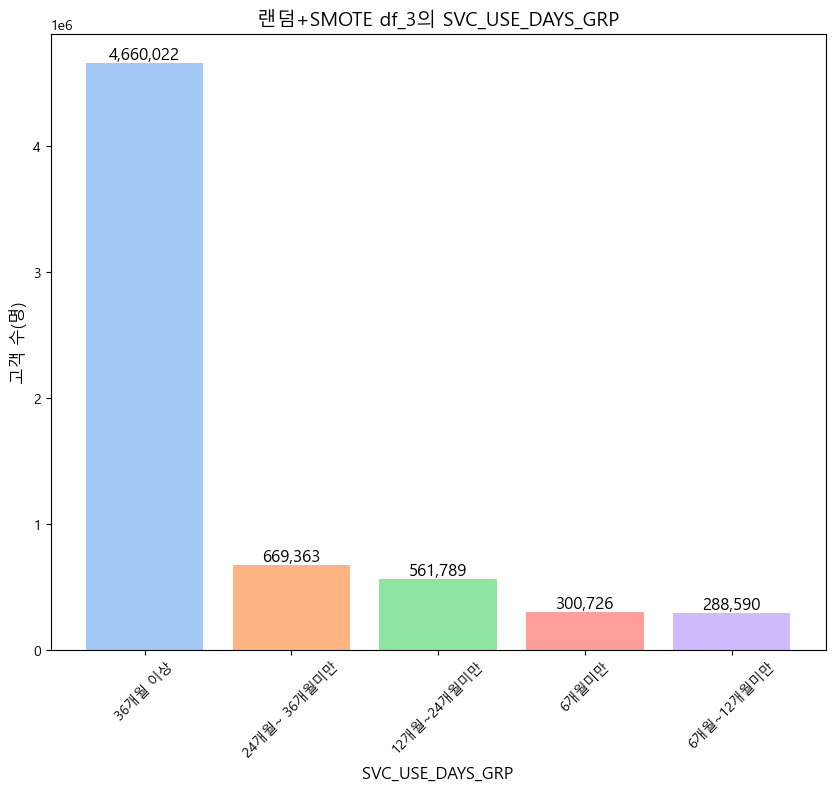

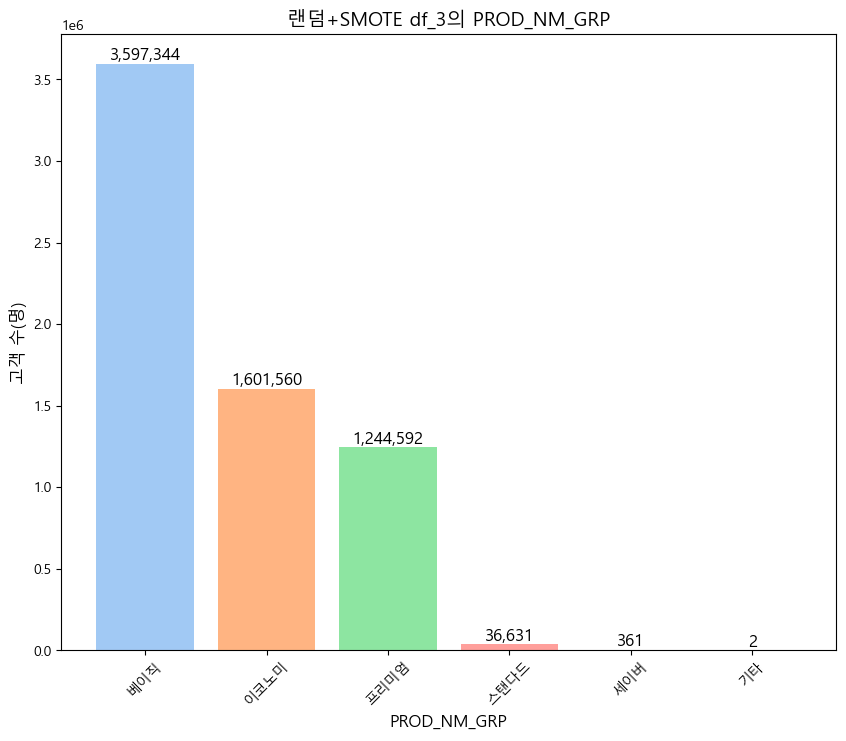

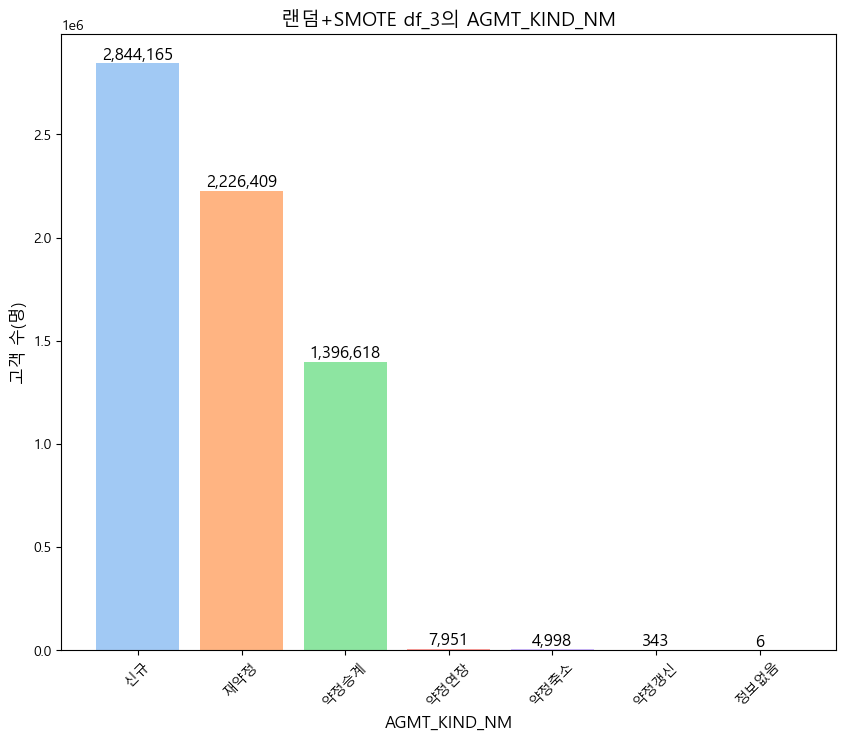

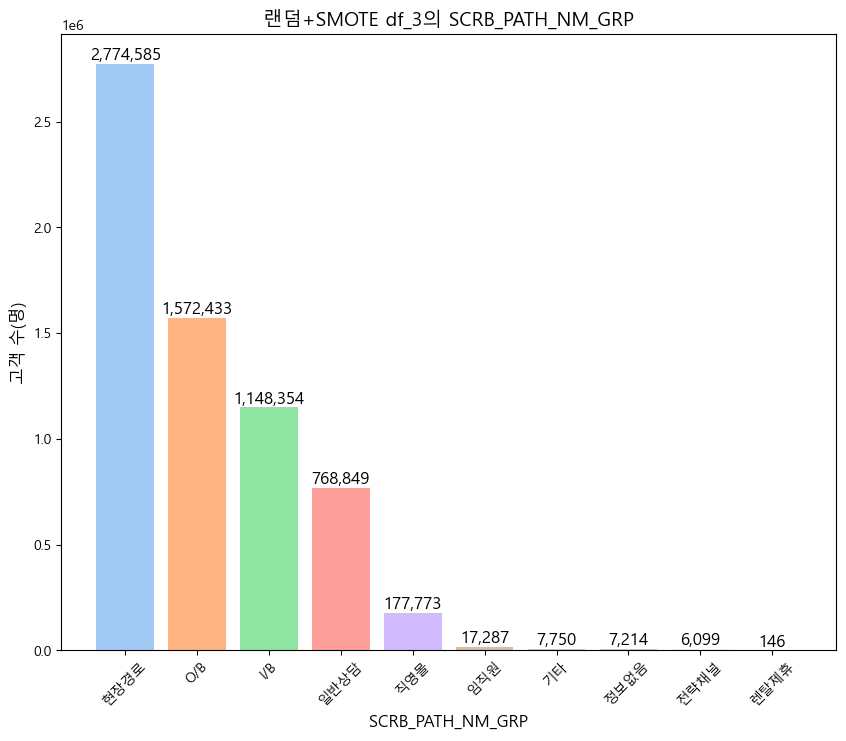

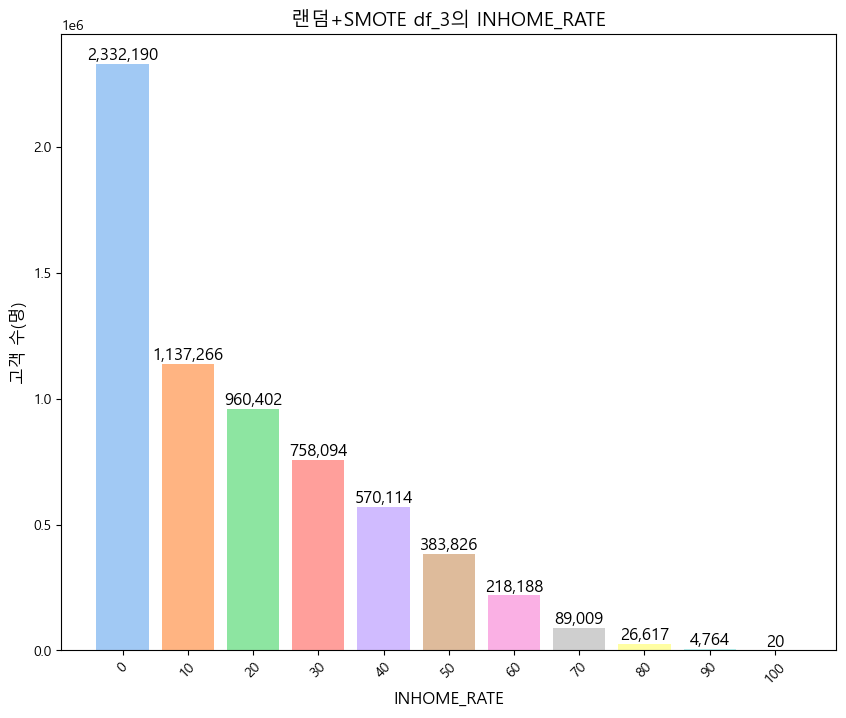

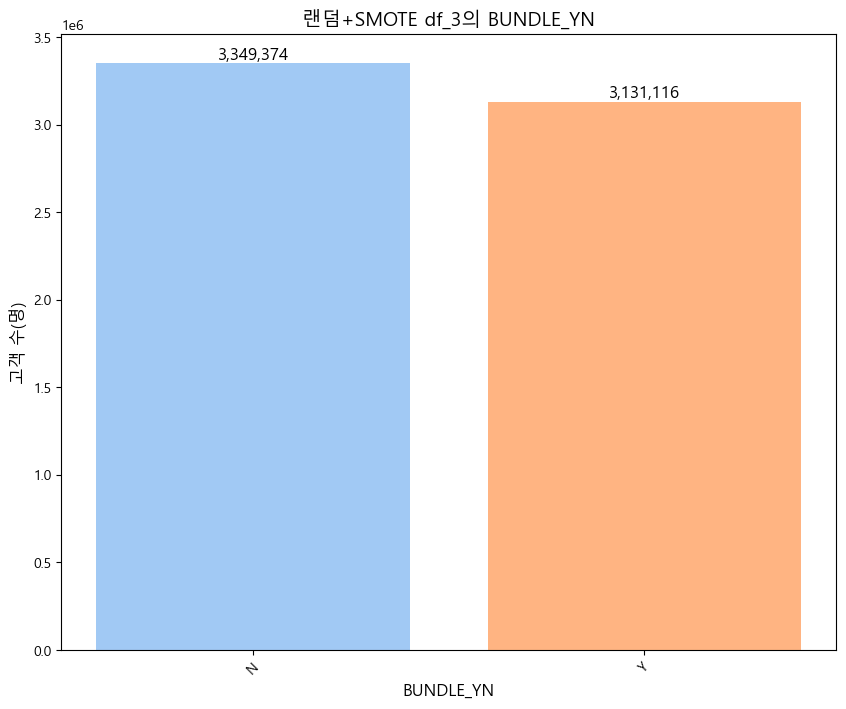

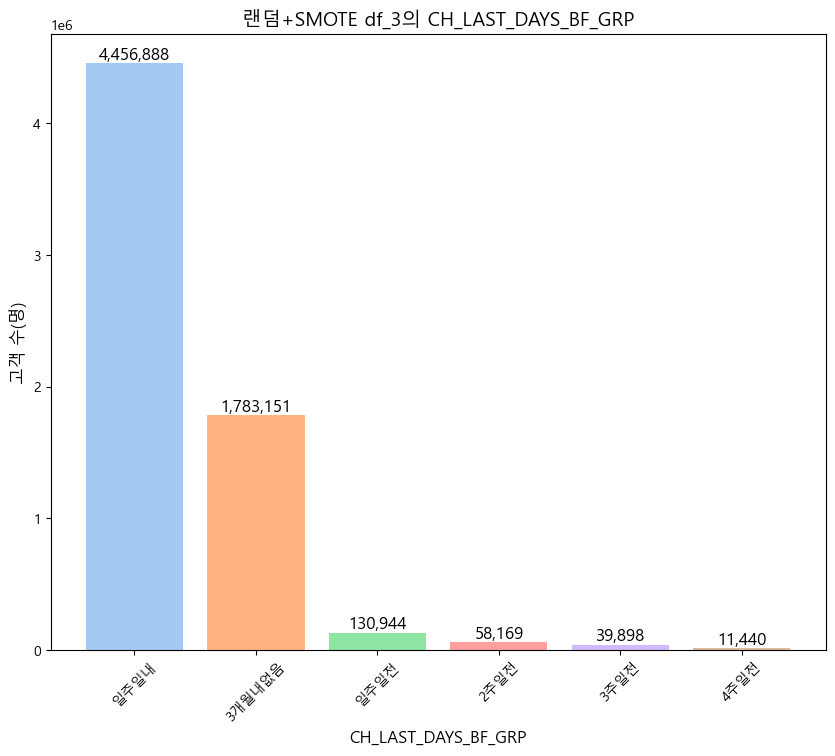

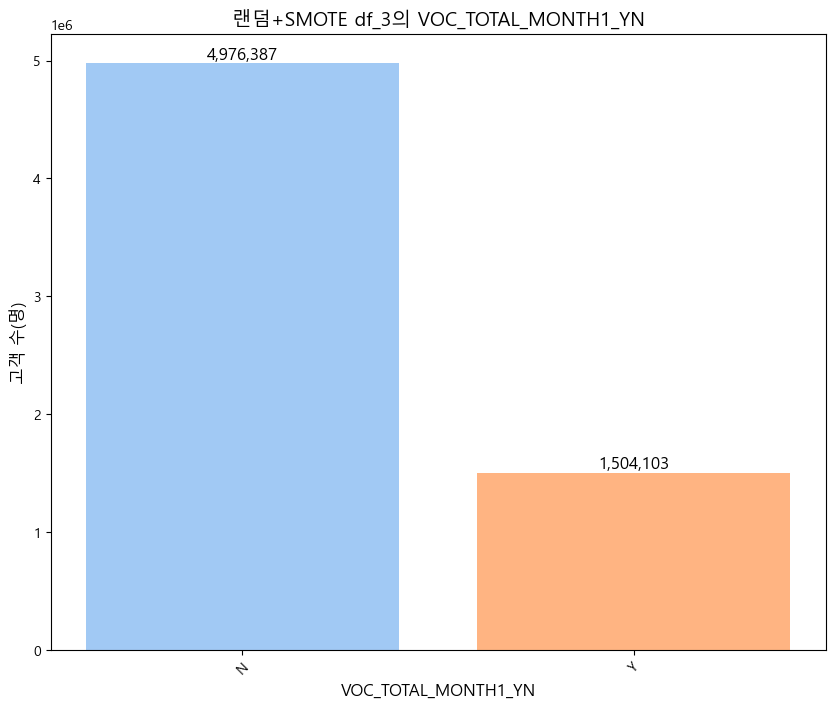

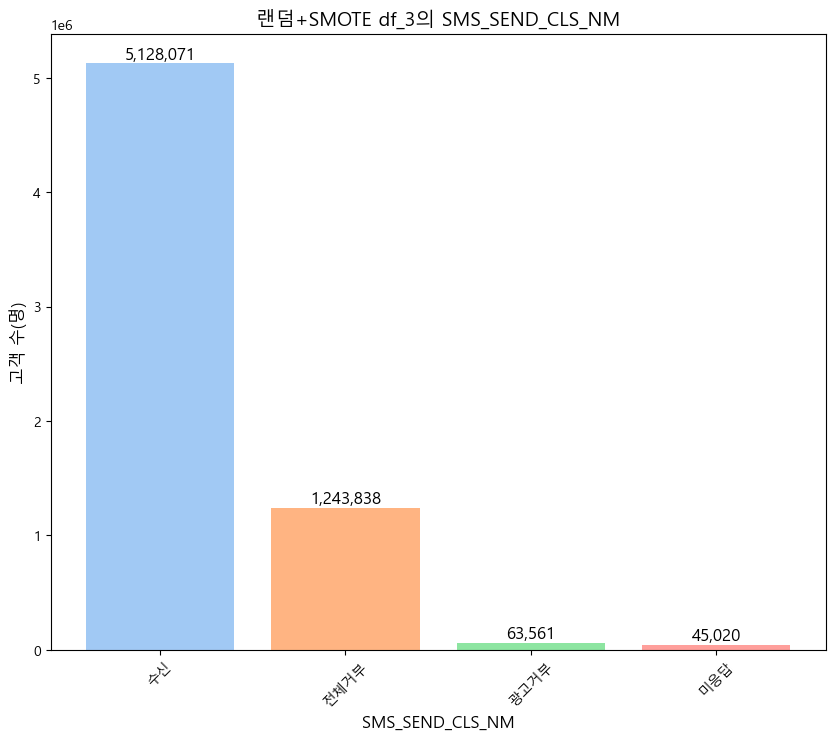

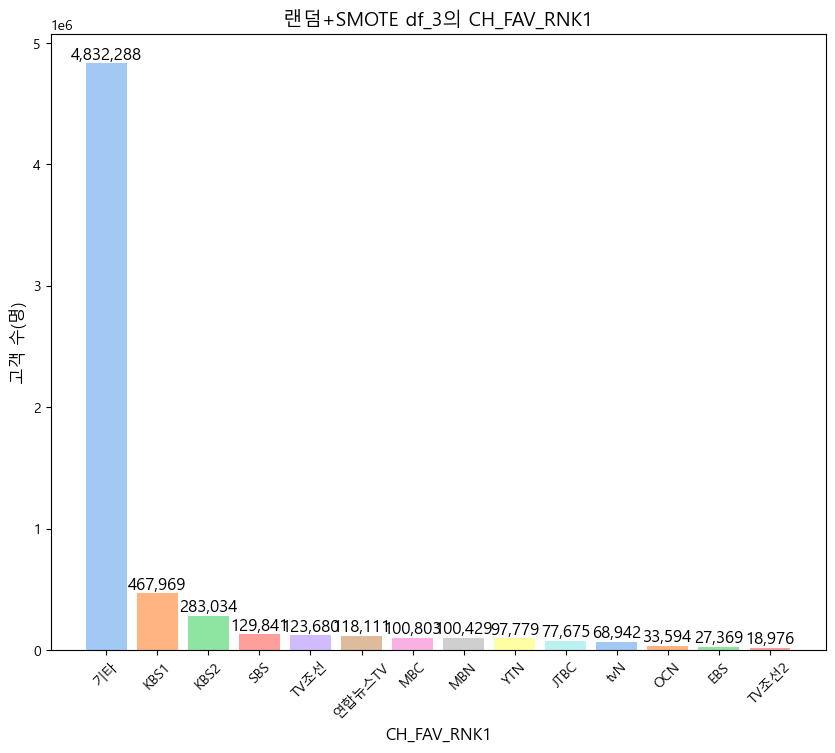

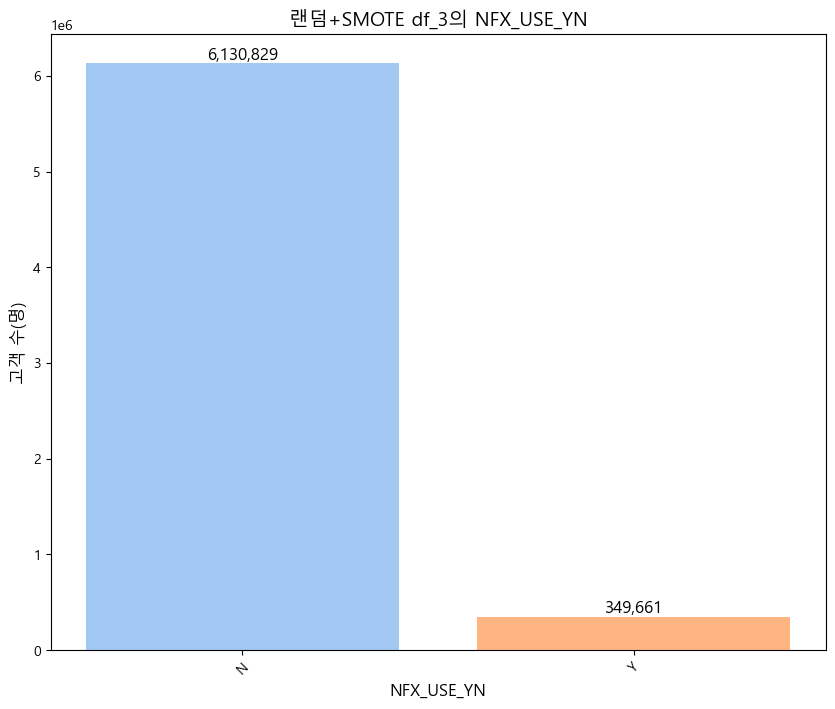

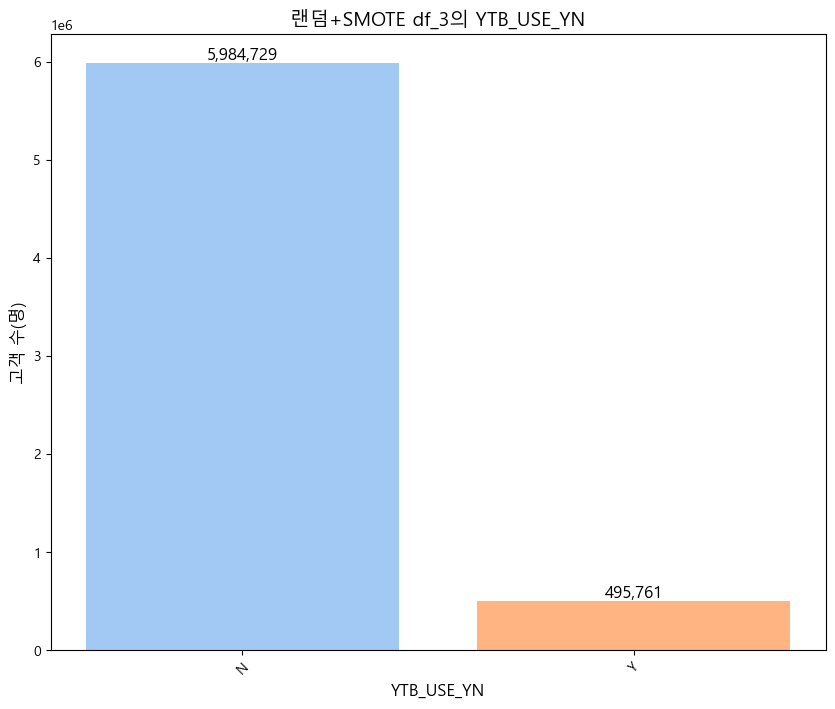

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_3.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_3[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('Í≥†Í∞ù Ïàò(Î™Ö)', fontsize=12)
        plt.title(f'ÎûúÎç§+SMOTE df_3Ïùò {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()


#### df_1 (ÎûúÎç§Ïñ∏ÎçîÏÉòÌîåÎßÅ) Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌôïÏù∏

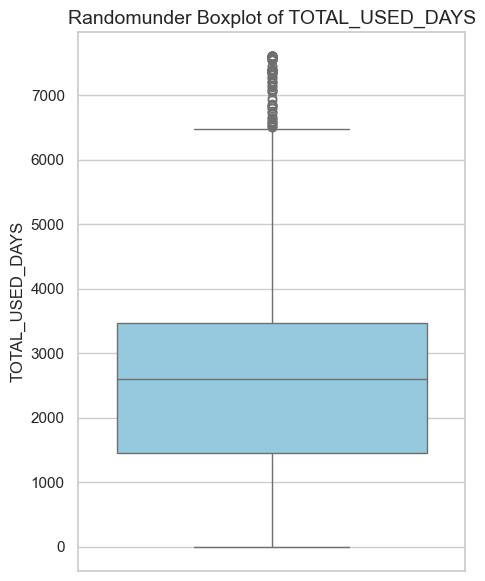

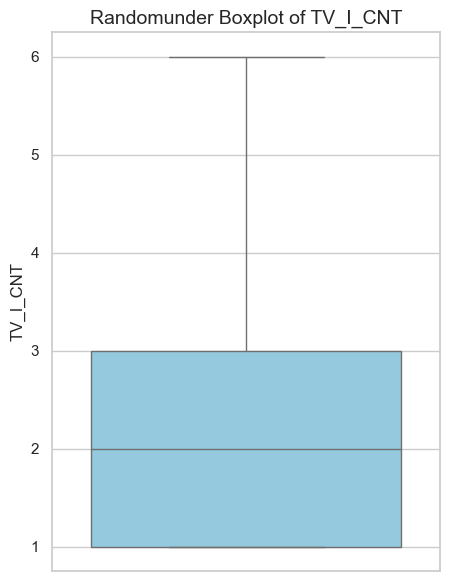

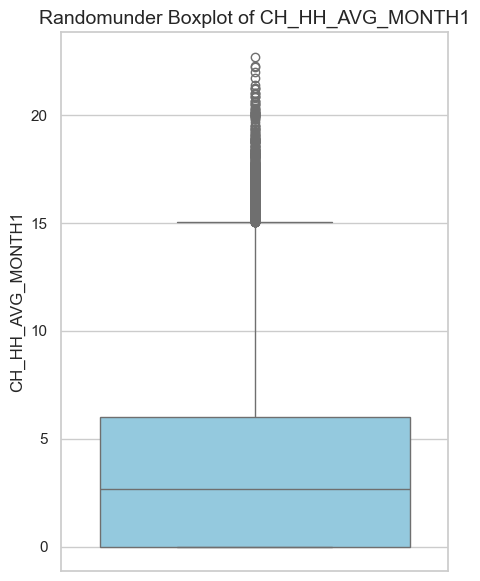

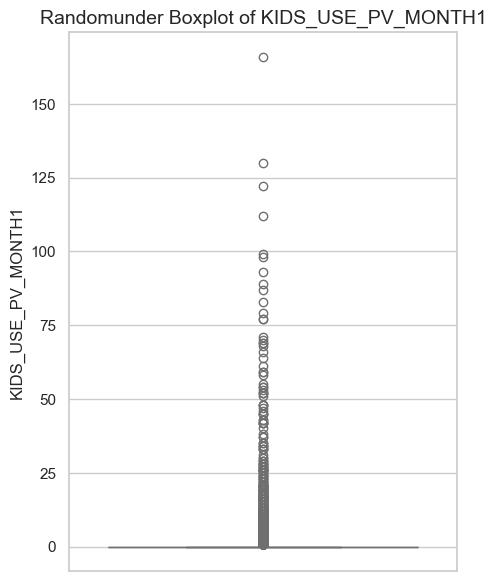

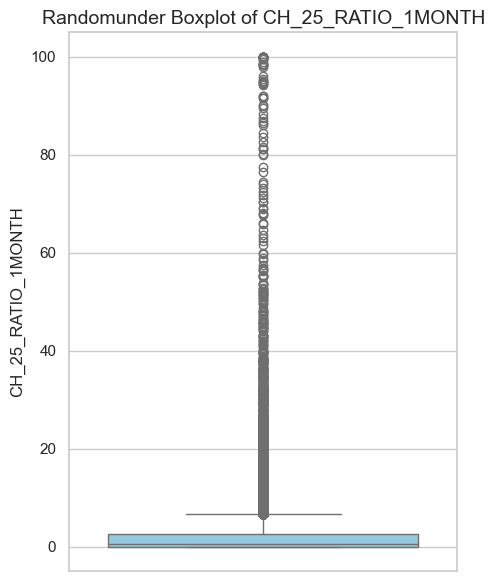

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_1[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'Randomunder Boxplot of {col}', fontsize=14)

    plt.show()

#### df_2 (SMOTE-NC) Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌôïÏù∏

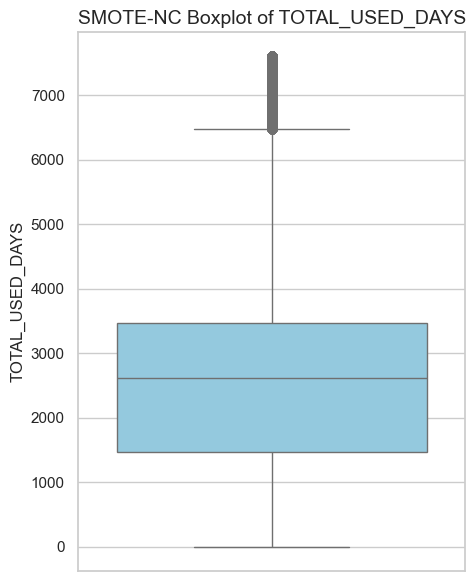

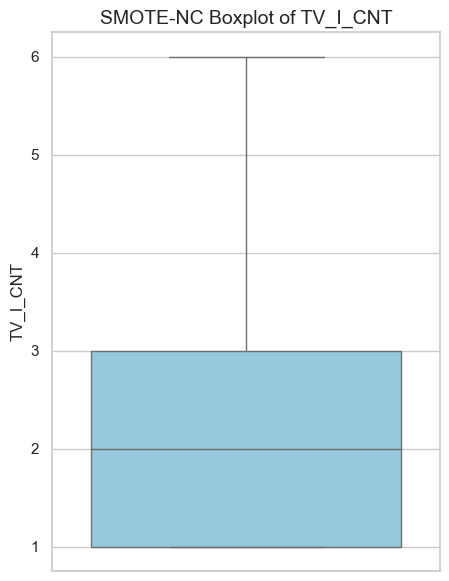

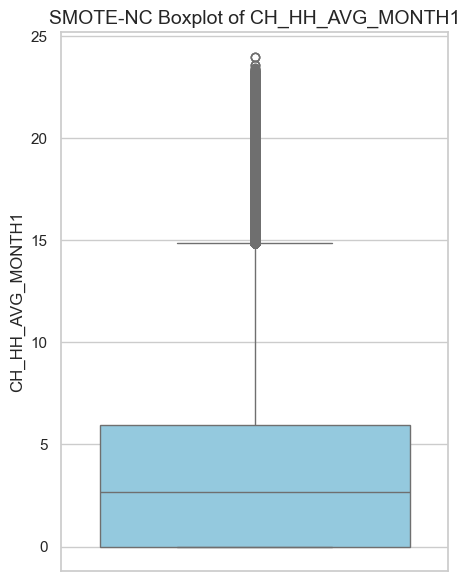

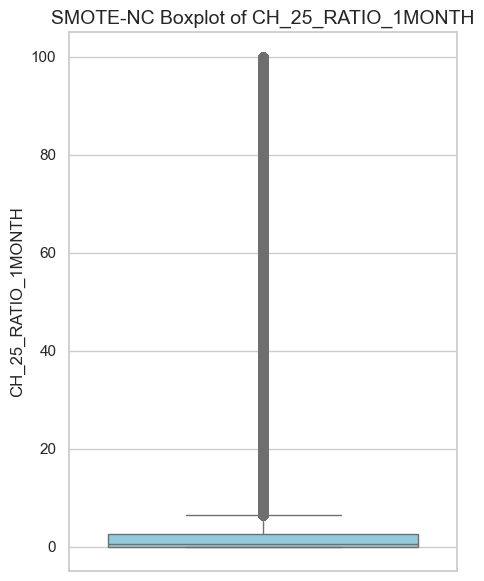

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_2.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_2[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'SMOTE-NC Boxplot of {col}', fontsize=14)

    plt.show()

#### df_3 (SMOTE-NC + ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) Ïó∞ÏÜçÌòï Î≥ÄÏàò ÌôïÏù∏

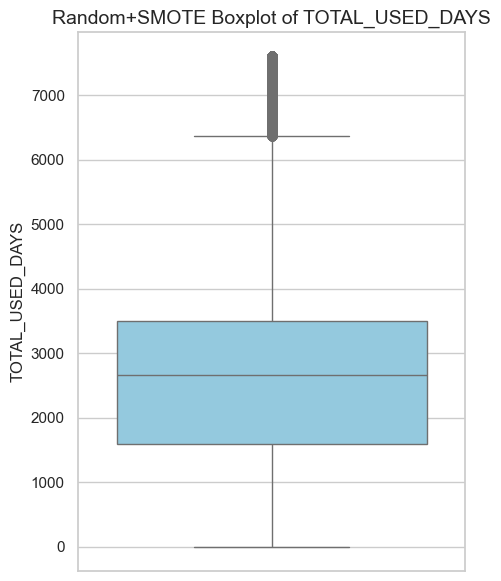

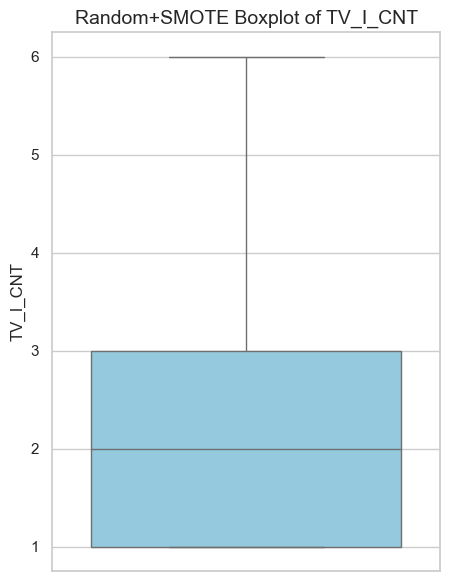

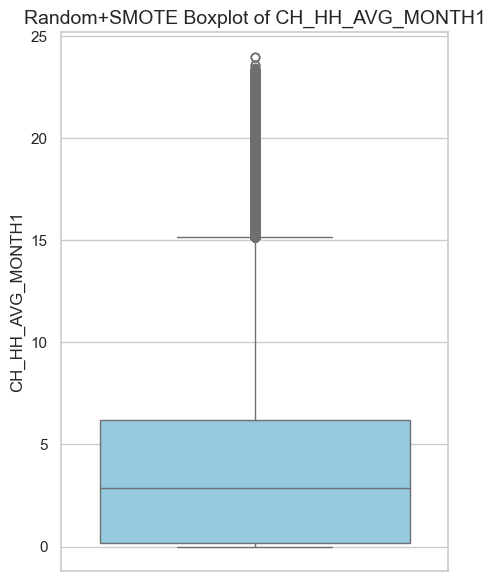

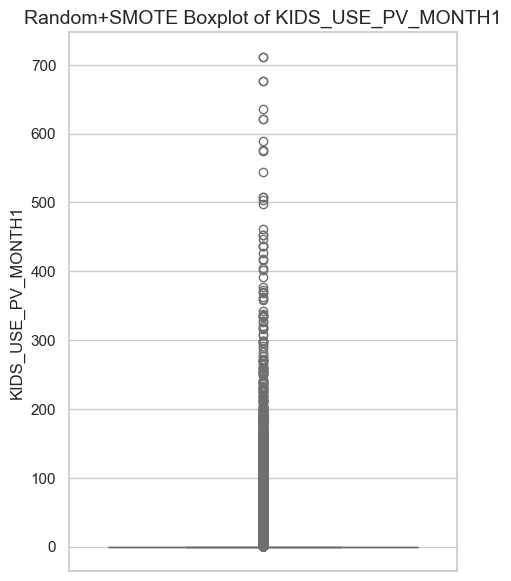

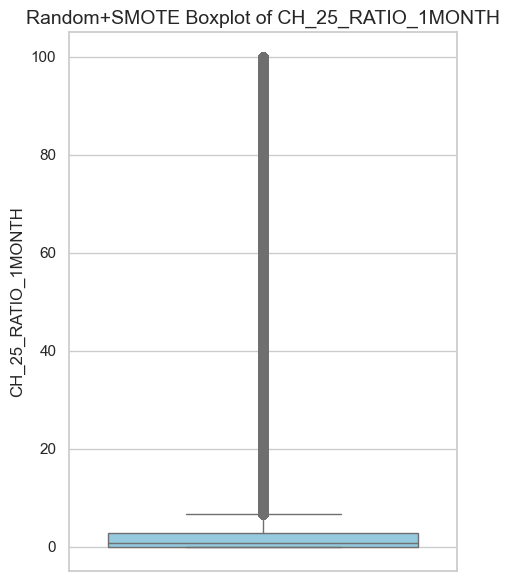

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_3.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_3[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'Random+SMOTE Boxplot of {col}', fontsize=14)

    plt.show()